
<center>
<h4>Universidad Nacional de Córdoba - Facultad de Matemática, Astronomía, Física y Computación</h4>
<h3>Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones</h3>
 <h2>Mentoría: Clasificación de Tumoresferas </h2>
</center>



<a name="exploratory_data_analysis"></a>
# **Práctico de Aprendizaje Supervisado**



Importamos las librerías necesarias:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For the regression part
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from scipy.optimize import curve_fit

# For the classification part
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, classification_report

from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA, KernelPCA

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

from sklearn.manifold import SpectralEmbedding


#sns.set_context('talk')
sns.set_theme()

import warnings
warnings.filterwarnings("ignore")


En este práctico, utilizaremos el archivo original *fiji_datos_0al7mo_labels.csv* que se encuentra en la carpeta *data/raw/*.

Además sumaremos los siguientes datos sintéticos que se encuentran en la carpeta *data/datos_sinteticos/*:
  * datos_sinteticos_dias_3_y_5.csv
  * synthetic_3y5_sint2.csv
  * synthetic_data_dia_3_si.csv
  * synthetic_data_dia_4_si.csv
  * synthetic_data_dia_5_si.csv

Como también dos archivos extras que están en la capeta *data/03_AS/*:
  * fiji_datos_mean_diam.csv
  * fiji_datos_noise.csv
  

## Regresión

$1.$   Utilizando del día 1 al 5 los datos clasificados como 'Esferoide' = 'si', realizar un ajuste del diámetro medio. Sean los datos reales *mean_diam_df* y la señal ruidosa *df_noise*.


In [2]:
mean_diam_df = pd.read_csv("data/03_AS/fiji_datos_mean_diam.csv")
mean_diam_df

,dia,mean
0,0,23.145003
1,1,31.781506
2,2,60.685558
3,3,101.092311
4,4,89.688273
5,5,110.212304


In [3]:
df_noise = pd.read_csv("data/03_AS/fiji_datos_noise.csv")
df_noise

,dia,mean
0,0,23.288560
1,1,30.287199
2,2,67.158238
3,3,122.369407
4,4,120.851605
5,5,110.141722
6,0,14.068722
7,1,38.645930
8,2,63.240382
9,3,104.866656


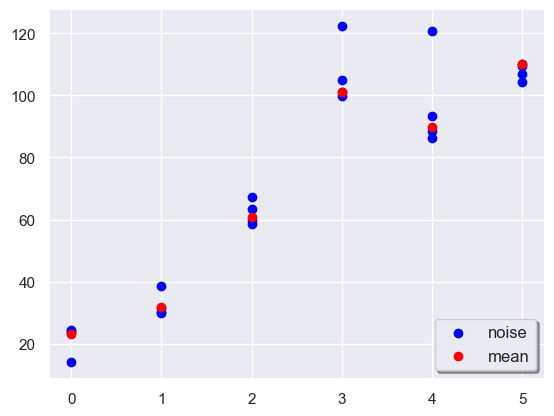

In [4]:
X_noise = df_noise['dia']
y_noise = df_noise['mean']
X_noise = np.array(X_noise.to_list())
y_noise = np.array(y_noise.to_list())

X_mean = mean_diam_df['dia']
y_mean = mean_diam_df['mean']
X_mean = np.array(X_mean.to_list())
y_mean = np.array(y_mean.to_list())


plt.scatter(X_noise, y_noise, color="blue", label="noise")
plt.scatter(X_mean, y_mean, color="red", label="mean")

legend = plt.legend(loc='lower right', shadow=True, fontsize='medium')

# Put a nicer background color on the legend.
# legend.get_frame().set_facecolor('C9')


plt.show()

## Probar un ajuste lineal, polinomial, probar el ajuste "óptimo" que da el menor error cuadrático y sobreajuste.  

In [5]:
from sklearn.model_selection import train_test_split

# DataFrame to use; check that we are supposed to use this one!
diam_df = df_noise

# Extract data
X = diam_df[['dia']]
y = diam_df['mean']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # You can adjust the test_size as needed

# Linear regression
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)
y_pred_lin_train = lin_model.predict(X_train)
y_pred_lin_test = lin_model.predict(X_test)

# Evaluate linear model
mse_lin_train = mean_squared_error(y_train, y_pred_lin_train)
r2_lin_train = r2_score(y_train, y_pred_lin_train)
mse_lin_test = mean_squared_error(y_test, y_pred_lin_test)
r2_lin_test = r2_score(y_test, y_pred_lin_test)

# Store evaluation metrics and models for comparison
model_metrics = {'Linear': {'model': lin_model, 'mse_train': mse_lin_train, 'r2_train': r2_lin_train, 'mse_test': mse_lin_test, 'r2_test': r2_lin_test}}
best_model = {'name': 'Linear', 'r2_train': r2_lin_train, 'r2_test': r2_lin_test}

# Polynomial regression (from degree 2 to n)
max_degree = 8  # change this to try out different maximum degrees
for degree in range(2, max_degree + 1):
    poly = PolynomialFeatures(degree=degree)
    X_poly_train = poly.fit_transform(X_train)
    X_poly_test = poly.transform(X_test)

    poly_model = LinearRegression()
    poly_model.fit(X_poly_train, y_train)
    y_pred_poly_train = poly_model.predict(X_poly_train)
    y_pred_poly_test = poly_model.predict(X_poly_test)

    # Evaluate polynomial model
    mse_poly_train = mean_squared_error(y_train, y_pred_poly_train)
    r2_poly_train = r2_score(y_train, y_pred_poly_train)
    mse_poly_test = mean_squared_error(y_test, y_pred_poly_test)
    r2_poly_test = r2_score(y_test, y_pred_poly_test)

    model_name = f'Poly_{degree}'
    model_metrics[model_name] = {'model': poly_model, 'mse_train': mse_poly_train, 'r2_train': r2_poly_train, 'mse_test': mse_poly_test, 'r2_test': r2_poly_test}

    # Update best model if needed
    if r2_poly_test > best_model['r2_test']:
        best_model = {'name': model_name, 'r2_train': r2_poly_train, 'r2_test': r2_poly_test}

# Plotting (you can keep this part the same)

# Print evaluation metrics
for model, metrics in model_metrics.items():
    print(f"{model} - Train MSE: {metrics['mse_train']}, Train R2: {metrics['r2_train']}, Test MSE: {metrics['mse_test']}, Test R2: {metrics['r2_test']}")

print(f"Best Model: {best_model['name']} with Train R2 = {best_model['r2_train']} and Test R2 = {best_model['r2_test']}")


Linear - Train MSE: 239.47624775664013, Train R2: 0.8147590587295203, Test MSE: 116.08216770681568, Test R2: 0.892522137358988
Poly_2 - Train MSE: 164.37346248474682, Train R2: 0.8728529647687445, Test MSE: 195.20152510282676, Test R2: 0.8192673076599873
Poly_3 - Train MSE: 119.9623661686668, Train R2: 0.9072060722752758, Test MSE: 145.96671844188677, Test R2: 0.8648527054174294
Poly_4 - Train MSE: 89.85201029404354, Train R2: 0.930497194950091, Test MSE: 73.03794876359892, Test R2: 0.9323758094815932
Poly_5 - Train MSE: 60.148928519690855, Train R2: 0.95347328079601, Test MSE: 41.145234210067834, Test R2: 0.961904555039574
Poly_6 - Train MSE: 60.148928519690855, Train R2: 0.95347328079601, Test MSE: 41.14523421005181, Test R2: 0.9619045550395888
Poly_7 - Train MSE: 60.14892851969087, Train R2: 0.95347328079601, Test MSE: 41.14523420998006, Test R2: 0.9619045550396552
Poly_8 - Train MSE: 60.14892851969087, Train R2: 0.95347328079601, Test MSE: 41.14523421102804, Test R2: 0.961904555038

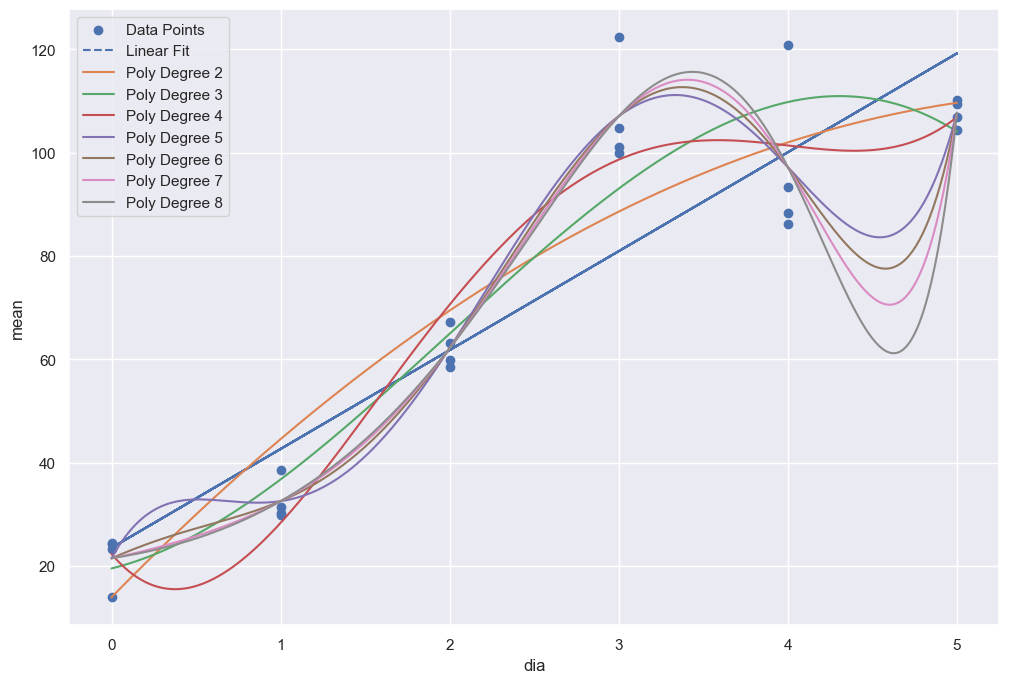

Linear - MSE: 208.57270812882277, R2: 0.8368330514664313
Poly_2 - MSE: 157.29561113119613, R2: 0.8769472520338177
Poly_3 - MSE: 119.94671373935535, R2: 0.9061653873938671
Poly_4 - MSE: 83.24985961412416, R2: 0.9348734276840532
Poly_5 - MSE: 53.59041940266886, R2: 0.9580760815592092
Poly_6 - MSE: 53.59041940266886, R2: 0.9580760815592092
Poly_7 - MSE: 53.59041940266886, R2: 0.9580760815592092
Poly_8 - MSE: 53.59041940266886, R2: 0.9580760815592092
Best Model: Poly_5 with R2 = 0.9580760815592092


In [6]:
# DataFrame to use; check that we are supposed to use this one!
diam_df = df_noise

# Extract data
X = diam_df[['dia']]
y = diam_df['mean']

# Linear regression
lin_model = LinearRegression()
lin_model.fit(X, y)
y_pred_lin = lin_model.predict(X)

# Evaluate linear model
mse_lin = mean_squared_error(y, y_pred_lin)
r2_lin = r2_score(y, y_pred_lin)

# Store evaluation metrics and models for comparison
model_metrics = {'Linear': {'model': lin_model, 'mse': mse_lin, 'r2': r2_lin}}
best_model = {'name': 'Linear', 'r2': r2_lin}

# Polynomial regression (from degree 2 to n)
max_degree = 8  # change this to try out different maximum degrees
for degree in range(2, max_degree + 1):
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)

    poly_model = LinearRegression()
    poly_model.fit(X_poly, y)
    y_pred_poly = poly_model.predict(X_poly)

    # Evaluate polynomial model
    mse_poly = mean_squared_error(y, y_pred_poly)
    r2_poly = r2_score(y, y_pred_poly)

    model_name = f'Poly_{degree}'
    model_metrics[model_name] = {'model': poly_model, 'mse': mse_poly, 'r2': r2_poly}

    # Update best model if needed
    if r2_poly > best_model['r2']:
        best_model = {'name': model_name, 'r2': r2_poly}

# Plotting
plt.figure(figsize=(12, 8))
plt.scatter(X, y, label='Data Points')
plt.plot(X, y_pred_lin, label='Linear Fit', linestyle='--')

# Plot polynomial fits
x_range = np.linspace(min(X.values), max(X.values), 500).reshape(-1, 1)
for degree in range(2, max_degree + 1):
    poly = PolynomialFeatures(degree=degree)
    X_poly_range = poly.fit_transform(x_range)
    y_poly_range = model_metrics[f'Poly_{degree}']['model'].predict(X_poly_range)
    plt.plot(x_range, y_poly_range, label=f'Poly Degree {degree}')

plt.xlabel('dia')
plt.ylabel('mean')
plt.legend()
plt.show()

# Print evaluation metrics
for model, metrics in model_metrics.items():
    print(f"{model} - MSE: {metrics['mse']}, R2: {metrics['r2']}")

print(f"Best Model: {best_model['name']} with R2 = {best_model['r2']}")


De esto, parece que el mejor modelo termina siendo el de grado 5. Revisemos esto usando un criterio que penalice de manera directa el añadir complejidad. Usemos el [Akaike information criterion (AIC)](https://en.wikipedia.org/wiki/Akaike_information_criterion) para elegir. 

Nota: no uso BIC porque no creo que el modelo “real” esté siendo considerado.

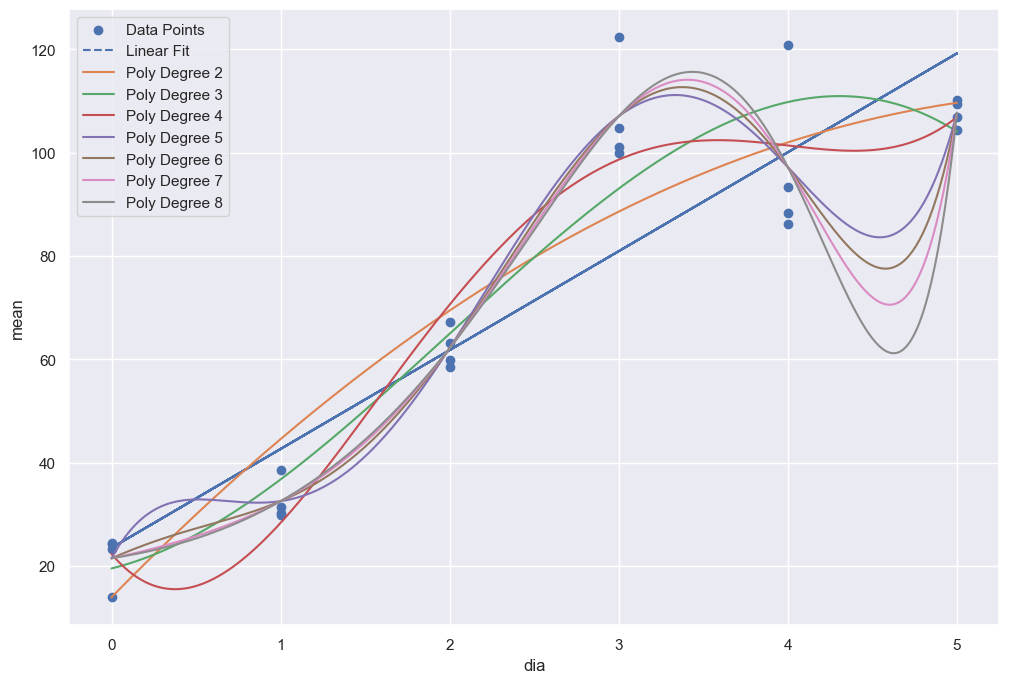

Linear - MSE: 208.57270812882277, AIC: 55.89361288346856
Poly_2 - MSE: 157.29561113119613, AIC: 51.1217538735165
Poly_3 - MSE: 119.94671373935535, AIC: 46.61585027940079
Poly_4 - MSE: 83.24985961412416, AIC: 39.851022692664614
Poly_5 - MSE: 53.59041940266886, AIC: 31.27959550235873
Poly_6 - MSE: 53.59041940266886, AIC: 33.27959550235873
Poly_7 - MSE: 53.59041940266886, AIC: 35.27959550235873
Poly_8 - MSE: 53.59041940266886, AIC: 37.27959550235873
Best Model: Poly_5 with AIC = 31.27959550235873


In [7]:
# DataFrame to use; check that we are supposed to use this one!
diam_df = df_noise

# Extract data
X = diam_df[['dia']]
y = diam_df['mean']
n = len(y)

# Function to calculate AIC
def calculate_aic(n, mse, num_params):
    aic = n * np.log(mse / n) + 2 * num_params
    return aic

# Linear Regression
lin_model = LinearRegression()
lin_model.fit(X, y)
y_pred_lin = lin_model.predict(X)
mse_lin = mean_squared_error(y, y_pred_lin)
aic_lin = calculate_aic(n, mse_lin, 2)  # 2 parameters: intercept and slope

# Store for comparison
model_metrics = {'Linear': {'model': lin_model, 'mse': mse_lin, 'aic': aic_lin}}
best_model = {'name': 'Linear', 'aic': aic_lin}

# Polynomial Regression (from degree 2 to n)
max_degree = 8  # Change this to try different maximum degrees
for degree in range(2, max_degree + 1):
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)

    poly_model = LinearRegression()
    poly_model.fit(X_poly, y)
    y_pred_poly = poly_model.predict(X_poly)
    mse_poly = mean_squared_error(y, y_pred_poly)
    aic_poly = calculate_aic(n, mse_poly, degree + 1)  # degree+1 parameters

    model_name = f'Poly_{degree}'
    model_metrics[model_name] = {'model': poly_model, 'mse': mse_poly, 'aic': aic_poly}

    # Update best model if needed
    if aic_poly < best_model['aic']:
        best_model = {'name': model_name, 'aic': aic_poly}

# Plotting
plt.figure(figsize=(12, 8))
plt.scatter(X, y, label='Data Points')
plt.plot(X, y_pred_lin, label='Linear Fit', linestyle='--')

# Plot polynomial fits
x_range = np.linspace(min(X.values), max(X.values), 500).reshape(-1, 1)
for degree in range(2, max_degree + 1):
    poly = PolynomialFeatures(degree=degree)
    X_poly_range = poly.fit_transform(x_range)
    y_poly_range = model_metrics[f'Poly_{degree}']['model'].predict(X_poly_range)
    plt.plot(x_range, y_poly_range, label=f'Poly Degree {degree}')

plt.xlabel('dia')
plt.ylabel('mean')
plt.legend()
plt.show()

# Print evaluation metrics
for model, metrics in model_metrics.items():
    print(f"{model} - MSE: {metrics['mse']}, AIC: {metrics['aic']}")

print(f"Best Model: {best_model['name']} with AIC = {best_model['aic']}")


Ambos criterios coinciden en que el mejor ajuste polinomial es el de grado 5. Grafiquemos el resultado, incluyendo los puntos de `mean_diam_df`.

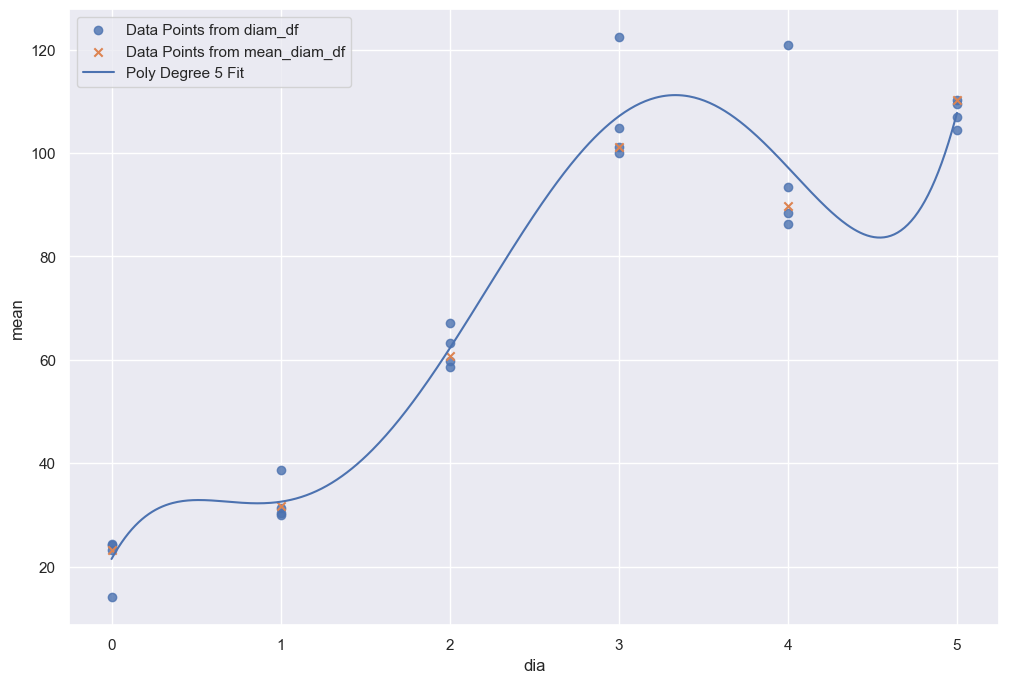

In [8]:
# (previous code for fitting models is required)

# Extract data from mean_diam_df
X_mean = mean_diam_df[['dia']]
y_mean = mean_diam_df['mean']

# Plotting
plt.figure(figsize=(12, 8))

# Plot data points from diam_df
plt.scatter(X, y, label='Data Points from diam_df', marker='o', alpha=0.8)

# Plot data points from mean_diam_df
plt.scatter(X_mean, y_mean, label='Data Points from mean_diam_df', marker='x', alpha=1.0)

# Plot polynomial fit of degree 5
poly_5 = PolynomialFeatures(degree=5)
X_poly_5_range = poly_5.fit_transform(x_range)
y_poly_5_range = model_metrics['Poly_5']['model'].predict(X_poly_5_range)
plt.plot(x_range, y_poly_5_range, label='Poly Degree 5 Fit', linestyle='-')

plt.xlabel('dia')
plt.ylabel('mean')
plt.legend()
plt.show()


## Clasificación

Aquí vamos a usar el dataset sin modificar, que se encuentra en 'raw/fiji_datos_0al7mo_labels.csv', en la carpeta del [repositorio](https://github.com/luciabarg/datos_tumoresferas/tree/main/data/datos_sinteticos) y de la [carpeta compartida](https://drive.google.com/drive/folders/1RqGNySwACN33Qopmw0nHmj5Yv4M78ZXi?usp=drive_link).

1) Teniendo en cuenta la naturaleza de nuestros datos, es adecuado plantearlo como un problema supervisado? De qué tipo? Justificar.
   
2) El dataset que tenemos, es linealmente separable?

3) Explorar las características de los datos sintéticos generados, comparar con los datos que tenemos de los días 3,4 y 5. Los datos se encuentran en la carpeta del [repositorio](https://github.com/luciabarg/datos_tumoresferas/tree/main/data/datos_sinteticos) y de la [carpeta compartida](https://drive.google.com/drive/folders/1RqGNySwACN33Qopmw0nHmj5Yv4M78ZXi?usp=drive_link):

4) Elegir una de las siguientes situaciones y generar su correspondiente dataset (leer hasta el final del enunciado antes de generarlos):

  * Tomar todo el dataset.

  * Realizar clasificación sólo con los datos del día 3, 4 y 5.

  * Tomar solo los días 3, 4 y 5, y sumar los datos sintéticos.
  
  * Utilizando sólo PCA (si quieren de todos días o solo de los días 3,4 y 5, con o sin datos sintéticos) pero indicar cuál se tomó.

\
**Elegir un escenario**, recordar eliminar una de las columnas altamente correlacionadas y también aquellas que no suman al problema. Si hubiera una columna constante, también deberían excluirla. Separen en conjuntos de entrenamiento y test, hacer tratamiento de ouliers, agregar columnas preprocesadas al original como algunas que sean combinaciones/modificaciones de las demás, multiplicaciones, logaritmos, potencias, [por ej](https://docs.google.com/presentation/d/e/2PACX-1vSLfKgsq-NuF2aWQF3OPkgLvBn25A2khGh0QIJkpFb6QgRZ7dGne32GEkTiC4M6yg/pub?start=false&loop=false&delayms=3000&slide=id.gb81ac3e375_0_32), verificando que no sean correlacionadas con las que ya tienen.


**Recordar que las transformaciones se realizan sobre el conjunto de train y luego se ajusta el de test**. Si hacen todo antes y luego separan, puede haber traspaso de información sobre el conjunto de train al test (*data leakage*).


Realizar un EDA rápido de como quedaron las variables y si la distribuciones en test son similares a las que tienen en train.
En todos los casos, tanto para train y test, visualizar la cantidad de datos para cada clase y calcular el porcentaje de las mismas.

Tenemos pocos datos, es muy posible que se genere overfitting. Cómo podrían tratar de solventar este inconveniente? Implementar si es posible.

Implementar sobre los conjuntos *test* y *train* del escenario elegido algún clasificador lineal como también probar DT, Random Forest y XGBoost.

Explorar con parámetros de defecto (modelo baseline) y con búsqueda de hiperparámetros y por medio de las diferentes métricas (sobre todo f1 y precision) determinar cuál es el mejor algoritmo de clasificación.
En los algoritmos que lo permitan, hacer listado de importancia de features y probar con diferentes combinaciones de columnas si la métrica hallada mejora si se disminuye la cantidad de columnas (puede ser que esto no ocurra también).

Con el algoritmo que tenga las mejores métricas , probar si mejora o empeoran la clasificación probando algún otro escenario (con todos los pasos que implica).

\
OPCIONAL:


Probar la métrica: coeficiente de correlación de [Matthews](https://bmcgenomics.biomedcentral.com/articles/10.1186/s12864-019-6413-7) (está implementado en sklearn como una métrica más: *from sklearn.metrics import matthews_corrcoef* )

Si se animan, tenemos 5 días. Probar clasificación multiclase para identificar a q día se corresponden las muestras. O tomar solo los 3 que usaron en los escenarios anteriores.

Super buenas prácticas en este [repositorio](https://github.com/daianadte/wids-cba-2023/), es muy instructivo chusmear sobre todo el archivo  ['06_FinalModel.ipynb'](https://github.com/daianadte/wids-cba-2023/blob/main/06_FinalModel.ipynb) solo para que vean un análisis posterior a implementar los modelos y que existen los Shap Values, que es una técnica utilizada para explicar las predicciones.


----
Como este es el último práctico, si se animan, podrían implementar clústering.
Pueden implementar kmeans sobre el dataset normalizado, usando PCA, o incluso animarse a probar t-SNE y UMAP.

Realizar EDA sobre los conjuntos que encontraron y traten de explicarlos.

Muchas veces en problemas de negocios, no es tan importante el modelo en sí, qué tan bien separa los datos sino la interpretabilidad que se puede dar a los resultados. Podríamos coordinar con Luciano para charlar si lo que encontraron a partir de las agrupaciones, es coherente o no, sería como parte de charlar con el "cliente" a ver si está de acuerdo a lo hallado. O sea, pueden encontrar explicaciones a los datos distintos que la de "esferoides".


## 1. ¿Problema Supervisado?

Consigna: teniendo en cuenta la naturaleza de nuestros datos, ¿es adecuado plantearlo como un problema supervisado? ¿De qué tipo? Justificar.

Respuesta: depende de cuál sea nuestro objetivo. Hay objetivos que podemos definir, bajo los cuales podemos plantear problemas de clasificación. Por ejemplo:
- Generar un modelo que clasifique en esferoide 'si' o 'no'
- Generar un modelo que clasifique los agregados según los días de cultivo que llevan
- Una combinación de los anteriores.

Si bien optamos por elegir plantear el problema del primer ejemplo, cabe destacar que podríamos plantearlo como un problema de otro tipo si quisiéramos. Por ejemplo, podríamos intentar identificar distintos tipos de agregados que no forman esferoides, con la esperanza de identificar la causa de que no lo sean. Este problema, requeriría identificar grupos dentro de los esferoides 'no', por lo que correspondería a un problema no supervisado.


In [9]:
raw_df = pd.read_csv("data/raw/fiji_datos_0al7mo_labels.csv")
raw_df

,labels,Area,X,Y,XM,YM,Perim.,BX,BY,Width,...,FeretY,FeretAngle,MinFeret,AR,Round,Solidity,Esferoide,dia,Diameter,n_diam
0,Esferas_BT474_dia_0_well_1_100X_1_blob_1,324.4440,1129.2718,102.2051,1129.2718,102.2051,67.3603,1118.8859,92.3913,21.0598,...,157,23.4287,19.7011,1.0653,0.9387,0.9500,si,0,20.95640,1.491357
1,Esferas_BT474_dia_0_well_1_100X_1_blob_2,497.5115,1517.5528,126.1022,1517.5528,126.1022,82.8004,1504.7554,113.4511,25.8152,...,192,16.1443,25.1289,1.0475,0.9546,0.9569,si,0,26.00200,2.848733
2,Esferas_BT474_dia_0_well_1_100X_1_blob_3,282.9078,1314.2815,126.0988,1314.2815,126.0988,62.1586,1304.3478,116.8478,19.7011,...,189,15.4222,18.3424,1.0395,0.9620,0.9519,si,0,19.38970,1.181258
3,Esferas_BT474_dia_0_well_1_100X_1_blob_5,500.7421,1189.2841,212.6155,1189.2841,212.6155,84.5571,1175.9511,200.4076,26.4946,...,309,174.1440,25.1359,1.0278,0.9730,0.9493,si,0,25.88475,2.810370
4,Esferas_BT474_dia_0_well_1_100X_1_blob_6,492.8964,1043.0782,247.7667,1043.0782,247.7667,82.0728,1030.5707,235.7337,25.1359,...,353,143.4270,24.4565,1.0186,0.9817,0.9643,si,0,25.33985,2.636596
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1013,Esferas_BT474_dia_7_well_2_100X_5_blob_2,539.0477,534.6299,153.9304,534.6299,153.9304,87.0414,521.7391,139.2663,25.1359,...,205,105.9454,25.1359,1.1762,0.8502,0.9570,no,7,27.40515,3.335248
1014,Esferas_BT474_dia_7_well_2_100X_5_blob_4,277.8311,195.4265,433.4826,195.4265,433.4826,62.5566,185.4620,424.5924,18.3424,...,627,128.6598,18.1132,1.2288,0.8138,0.9473,no,7,19.93145,1.283064
1015,Esferas_BT474_dia_7_well_2_100X_5_blob_5,435.6687,122.7770,446.2430,122.7770,446.2430,77.6671,112.0924,433.4239,20.3804,...,638,107.5256,20.3804,1.2472,0.8018,0.9657,no,7,23.72610,2.164266
1016,Esferas_BT474_dia_7_well_2_100X_6_blob_3,531.2020,58.4620,261.9482,58.4620,261.9482,89.5939,44.8370,248.6413,26.4946,...,399,34.3803,24.9780,1.2569,0.7956,0.9350,no,7,28.12875,3.606474


In [10]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1018 entries, 0 to 1017
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   labels      1018 non-null   object 
 1   Area        1018 non-null   float64
 2   X           1018 non-null   float64
 3   Y           1018 non-null   float64
 4   XM          1018 non-null   float64
 5   YM          1018 non-null   float64
 6   Perim.      1018 non-null   float64
 7   BX          1018 non-null   float64
 8   BY          1018 non-null   float64
 9   Width       1018 non-null   float64
 10  Height      1018 non-null   float64
 11  Circ.       1018 non-null   float64
 12  Feret       1018 non-null   float64
 13  FeretX      1018 non-null   int64  
 14  FeretY      1018 non-null   int64  
 15  FeretAngle  1018 non-null   float64
 16  MinFeret    1018 non-null   float64
 17  AR          1018 non-null   float64
 18  Round       1018 non-null   float64
 19  Solidity    1018 non-null  

Por el resultado del info, es el mismo `DataFrame` del primer entregable. Podemos reutilizar algunas cosas del análisis de ese momento, agregando algo de embeddings y clustering para revisar si los outliers tienen alguna estructura.

**Sobre la selección de columnas**

No selecciono width ni height porque son un poco redundantes dado lo demás. Tampoco FeretAngle, porque tiene que ver con la orientación de la foto, ni la razón de aspecto (AR), pues es función de Round. El área convexa (en solidity) tiene una información similar a circ y round (podría hacer LDA con estas y quedarme con algunas componentes). El diámetro es el promedio entre el Feret y el MinFeret (máxima y mínima distancia entre puntos del agregado), por lo que es LD con estos. A su vez, el número de céulas es una función del diámetro.

In [11]:
selected_cols = [
    "labels",
    "dia",
    "Area",
    "Perim.",
    # "Width",
    # "Height",
    "Feret",
    # "FeretAngle",
    "MinFeret",
    # "AR",
    "Circ.",
    "Round",
    "Solidity",
    "Esferoide",
    # "Diameter",
    # "n_diam",
]

df = raw_df[selected_cols]
df

,labels,dia,Area,Perim.,Feret,MinFeret,Circ.,Round,Solidity,Esferoide
0,Esferas_BT474_dia_0_well_1_100X_1_blob_1,0,324.4440,67.3603,22.2117,19.7011,0.8985,0.9387,0.9500,si
1,Esferas_BT474_dia_0_well_1_100X_1_blob_2,0,497.5115,82.8004,26.8751,25.1289,0.9119,0.9546,0.9569,si
2,Esferas_BT474_dia_0_well_1_100X_1_blob_3,0,282.9078,62.1586,20.4370,18.3424,0.9201,0.9620,0.9519,si
3,Esferas_BT474_dia_0_well_1_100X_1_blob_5,0,500.7421,84.5571,26.6336,25.1359,0.8801,0.9730,0.9493,si
4,Esferas_BT474_dia_0_well_1_100X_1_blob_6,0,492.8964,82.0728,26.2232,24.4565,0.9195,0.9817,0.9643,si
...,...,...,...,...,...,...,...,...,...,...
1013,Esferas_BT474_dia_7_well_2_100X_5_blob_2,7,539.0477,87.0414,29.6744,25.1359,0.8941,0.8502,0.9570,no
1014,Esferas_BT474_dia_7_well_2_100X_5_blob_4,7,277.8311,62.5566,21.7497,18.1132,0.8922,0.8138,0.9473,no
1015,Esferas_BT474_dia_7_well_2_100X_5_blob_5,7,435.6687,77.6671,27.0718,20.3804,0.9076,0.8018,0.9657,no
1016,Esferas_BT474_dia_7_well_2_100X_6_blob_3,7,531.2020,89.5939,31.2795,24.9780,0.8316,0.7956,0.9350,no


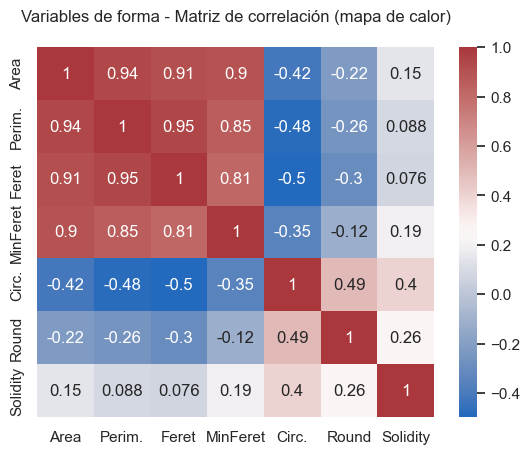

In [12]:
shape_cols = [
    "Area",
    "Perim.",
    "Feret",
    "MinFeret",
    "Circ.",
    "Round",
    "Solidity",
]

df_corr = df[shape_cols].dropna().corr(method='kendall')
sns.heatmap(df_corr, annot=True, cmap='vlag')
plt.title('Variables de forma - Matriz de correlación (mapa de calor)\n')
plt.show()

# Do this again separating by days

## 2. Separabilidad Lineal

Consigna: El dataset que tenemos, ¿es linealmente separable?.

Si el dataset es linealmente separable (tomando las categorías como esferoide 'si' y 'no'), un perceptrón simple tendría que lograr una clasificación perfecta.

In [13]:
df['Esferoide'].unique()

array(['si', 'no'], dtype=object)

In [14]:
# Map 'Esferoide' column to 1s and 0s
df['Esferoide'] = df['Esferoide'].map({'si': 1, 'no': 0})

# Separate features and labels
X = df.drop(['labels', 'Esferoide'], axis=1)
y = df['Esferoide']

# Split the data into training and testing sets
# X_train_percep, X_test_percep, y_train_percep, y_test_percep = train_test_split(X, y, test_size=0.2, random_state=42)
# We don't do the former since we just want the perceptron to score perfect for this data set
X_train_percep = X
y_train_percep = y

# Scale the features
scaler = StandardScaler()
X_train_percep = scaler.fit_transform(X_train_percep)
# X_test_percep = scaler.transform(X_test_percep)

# Initialize and train the perceptron model
clf = Perceptron(max_iter=2000, tol=1e-4, random_state=42)
clf.fit(X_train_percep, y_train_percep)

# Make predictions and evaluate accuracy
y_pred_train_percep = clf.predict(X_train_percep)
# y_pred_test_percep = clf.predict(X_test_percep)

accuracy_train = accuracy_score(y_train_percep, y_pred_train_percep)
# accuracy_test = accuracy_score(y_test_percep, y_pred_test_percep)

print(f"Training accuracy: {accuracy_train}")
# print(f"Test accuracy: {accuracy_test}")

# Determine linear separability
if accuracy_train == 1.0 and accuracy_test == 1.0:
    print("The data is linearly separable.")
else:
    print("The data is not linearly separable.")


Training accuracy: 0.6434184675834971
The data is not linearly separable.


Como podemos ver, el dataset no es linealmente separable por mucho.

## 3. Datos Sintéticos

Consigna: Explorar las características de los datos sintéticos generados, comparar con los datos que tenemos de los días 3,4 y 5. Los datos se encuentran en la carpeta del repositorio y de la carpeta compartida.

In [15]:
# Lista de nombres de archivos CSV que deseas unificar
archivos = [
    "https://raw.githubusercontent.com/luciabarg/datos_tumoresferas/main/data/datos_sinteticos/datos_sinteticos_dias_3_y_5.csv",
    "https://raw.githubusercontent.com/luciabarg/datos_tumoresferas/main/data/datos_sinteticos/synthetic_3y5_sint2.csv",
    "https://raw.githubusercontent.com/luciabarg/datos_tumoresferas/main/data/datos_sinteticos/synthetic_data_dia_3_si.csv",
    "https://raw.githubusercontent.com/luciabarg/datos_tumoresferas/main/data/datos_sinteticos/synthetic_data_dia_4_si.csv",
    "https://raw.githubusercontent.com/luciabarg/datos_tumoresferas/main/data/datos_sinteticos/synthetic_data_dia_5_si.csv"
]

# Inicializa un DataFrame vacío
synth_df = pd.DataFrame()

# Itera a través de las URLs de los archivos y los lee y concatena en synth_df
for url in archivos:
    # Lee el archivo CSV desde la URL y lo convierte en un DataFrame
    df_syn = pd.read_csv(url)
    
    # Concatena el DataFrame en synth_df
    synth_df = pd.concat([synth_df, df_syn], ignore_index=True)

# Ahora, synth_df contiene todos los datos de los archivos CSV unificados desde el repositorio remoto de GitHub.
from io import StringIO

# URL base del repositorio en GitHub
base_url = "https://raw.githubusercontent.com/luciabarg/datos_tumoresferas/main/data/datos_sinteticos/"


In [16]:
print(synth_df.describe())

# conteo de datos por día

synth_df.groupby(['dia', 'Esferoide']).size().reset_index(name='total')

               Area      Perim.       Circ.       Feret    MinFeret  \
count    363.000000  363.000000  363.000000  363.000000  363.000000   
mean    6832.842615  278.701710    0.665117   89.167220   78.299711   
std     6006.460925  151.344733    0.466878   46.799274   41.821202   
min      122.762600   41.118800   -0.627087   14.185200   12.152500   
25%     1609.166196  161.590854    0.753149   51.828129   45.417735   
50%     5260.138394  256.976503    0.826981   84.036321   74.293400   
75%    10371.723023  383.377816    0.877998  123.949456  105.148006   
max    22355.996705  626.727300    0.944000  199.679102  175.936400   

               AR       Round    Solidity         dia    Diameter      n_diam  
count  363.000000  363.000000  363.000000  363.000000  363.000000  363.000000  
mean     1.165060    0.877226    0.961841    3.969697   81.348233  202.206395  
std      0.150432    0.089028    0.020462    0.929365   43.107936  235.175379  
min      1.001200    0.552828    0.89928

,dia,Esferoide,total
0,3,no,60
1,3,si,102
2,4,si,50
3,5,no,64
4,5,si,87


**No hay datos para esferoide "no" en día 4**

In [17]:
synth_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 363 entries, 0 to 362
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   labels     363 non-null    object 
 1   Area       363 non-null    float64
 2   Perim.     363 non-null    float64
 3   Circ.      363 non-null    float64
 4   Feret      363 non-null    float64
 5   MinFeret   363 non-null    float64
 6   AR         363 non-null    float64
 7   Round      363 non-null    float64
 8   Solidity   363 non-null    float64
 9   Esferoide  363 non-null    object 
 10  dia        363 non-null    int64  
 11  Diameter   363 non-null    float64
 12  n_diam     363 non-null    float64
dtypes: float64(10), int64(1), object(2)
memory usage: 37.0+ KB


no existen datos nulos en las columnas. No obstante se constata nuevamente esto y la existencia de valores negativos

In [18]:
# Búsqueda de valores nulos por columna
valores_nulos = synth_df.isnull().sum()

# Búsqueda de valores negativos por columna 
numeric_columns = synth_df.select_dtypes(include=np.number)
valores_negativos = pd.DataFrame(0, index=numeric_columns.columns, columns=['Cantidad'])
for columna in numeric_columns.columns:
    cantidad_negativos = (numeric_columns[columna] < 0).sum()
    valores_negativos.loc[columna, 'Cantidad'] = cantidad_negativos

# Imprimir los resultados solo para columnas con valores nulos o negativos
for columna in synth_df.columns:
    cantidad_nulos = valores_nulos[columna]
    if columna in valores_negativos.index:
        cantidad_negativos = valores_negativos.loc[columna, 'Cantidad']
    else:
        cantidad_negativos = 0
    if cantidad_nulos > 0 or cantidad_negativos > 0:
        print(f"Columna: {columna}")
        if cantidad_nulos > 0:
            print(f"Valores nulos: {cantidad_nulos}")
        if cantidad_negativos > 0:
            print(f"Valores negativos: {cantidad_negativos}")
        print("----------------------")


Columna: Circ.
Valores negativos: 41
----------------------


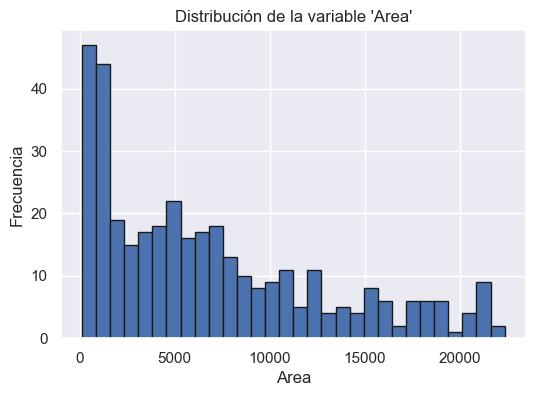

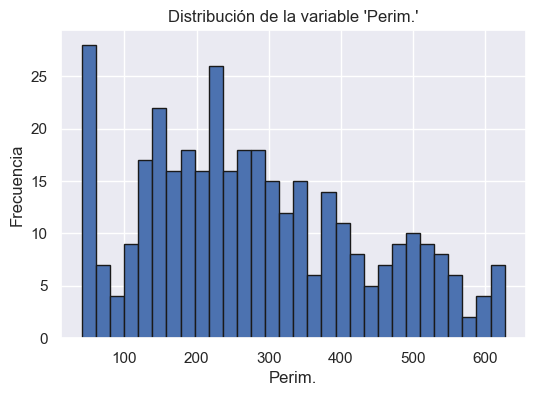

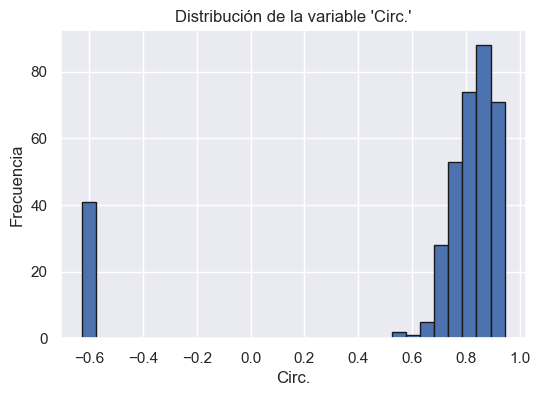

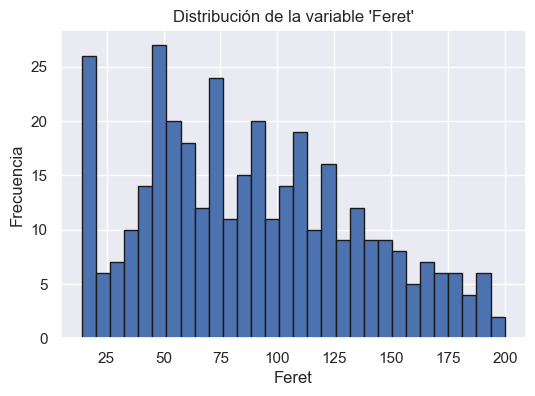

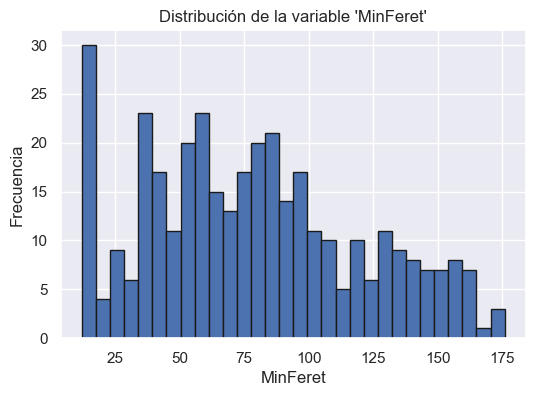

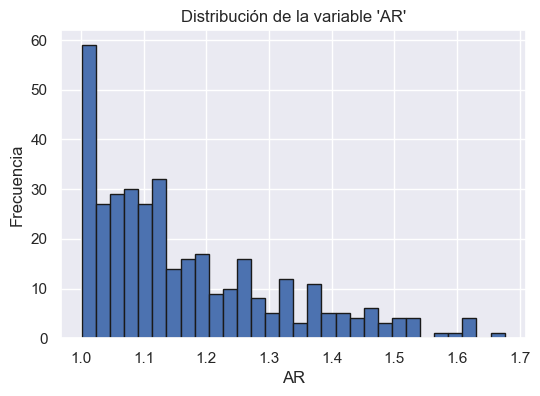

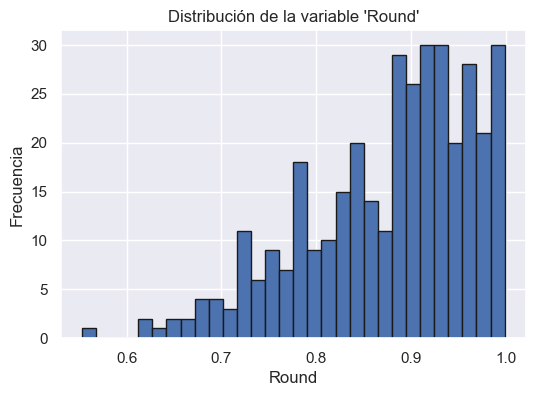

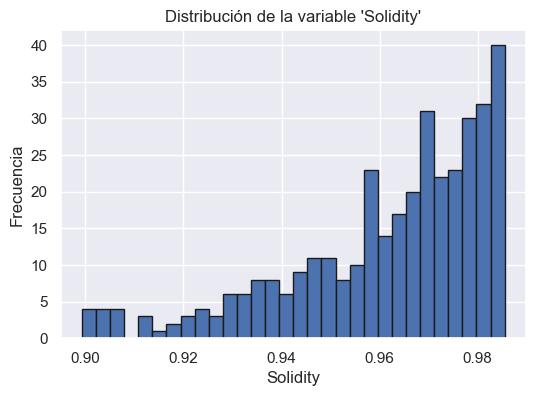

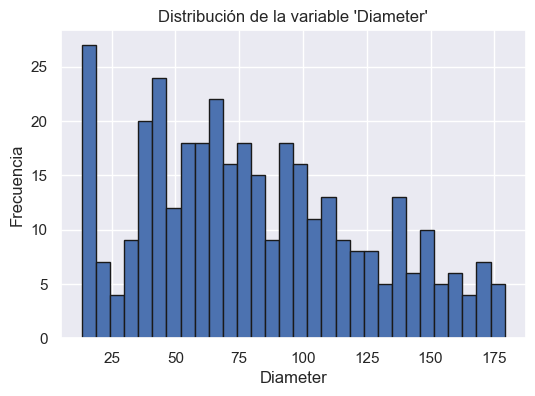

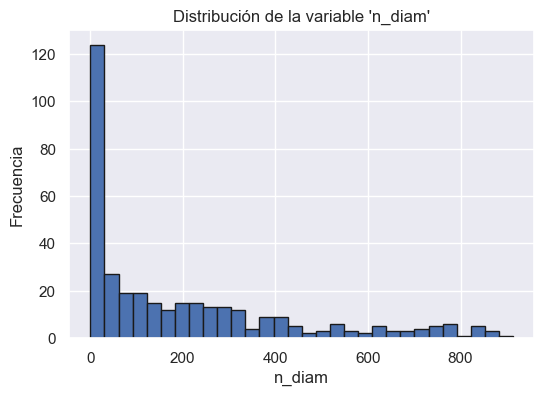

In [19]:
cols_syn = ['Area', 'Perim.', 'Circ.', 'Feret', 'MinFeret', 'AR', 'Round',
       'Solidity', 'Diameter', 'n_diam']
# Itera a través de las columnas del DataFrame synth_df
for column in cols_syn:
    # Crea un histograma para visualizar la distribución de la columna actual
    plt.figure(figsize=(6, 4))  # Tamaño de la figura (opcional)
    plt.hist(synth_df[column], bins=30, edgecolor='k')  # Histograma con 30 bins y bordes negros
    plt.title(f"Distribución de la variable '{column}'")  # Título del gráfico
    plt.xlabel(f'{column}')  # Etiqueta del eje x
    plt.ylabel("Frecuencia")  # Etiqueta del eje y
    plt.grid(True)  # Agrega una cuadrícula (opcional)

    # Muestra el gráfico
    plt.show()


Se confirma con estos gráficos de distribuciones que la variable circularidad posee datos negativos. Por lo cual se decide eliminarlos

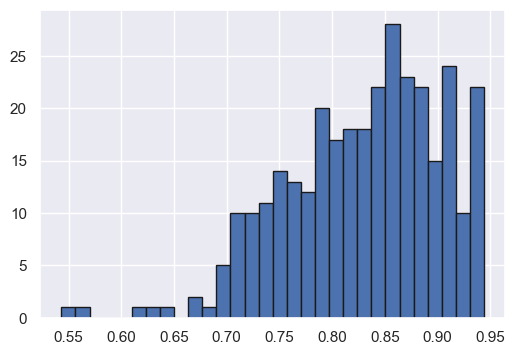

In [20]:
synth_df_filtered = synth_df[synth_df['Circ.'] >= 0]

plt.figure(figsize=(6, 4))  # Tamaño de la figura (opcional)
plt.hist(synth_df_filtered["Circ."], bins=30, edgecolor='k')  # Histograma con 30 bins y bordes negros

plt.show()

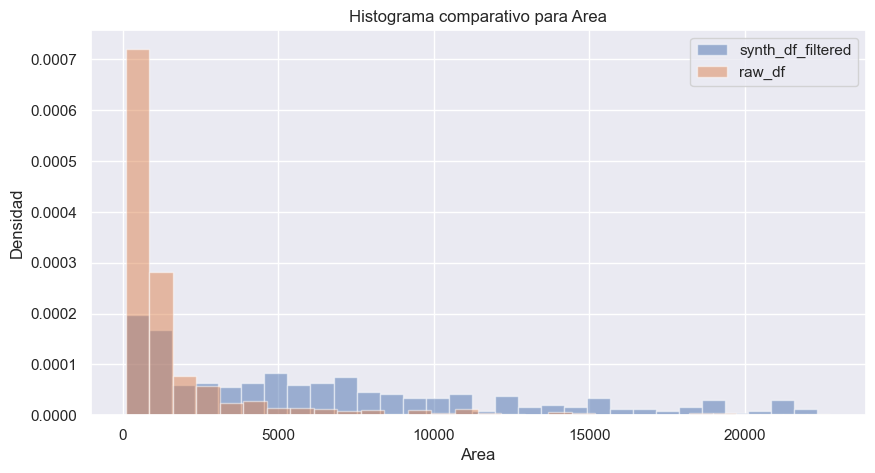

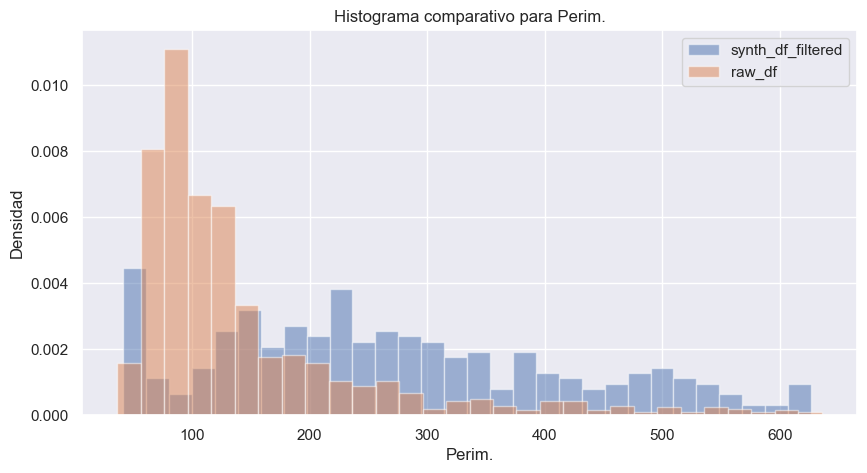

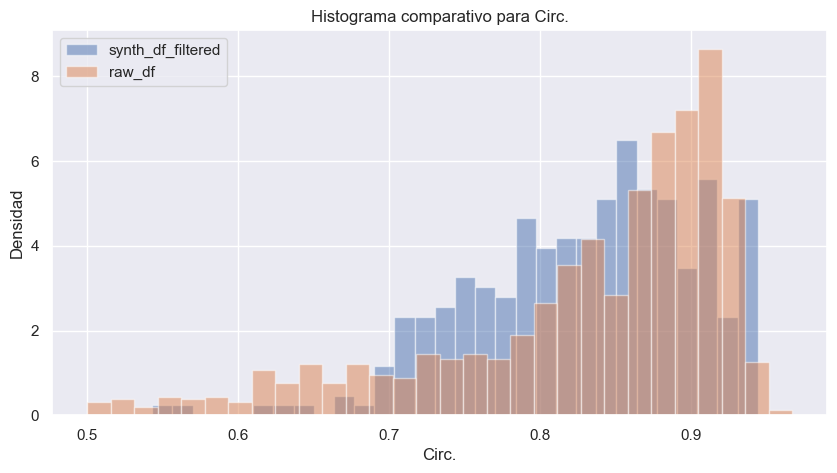

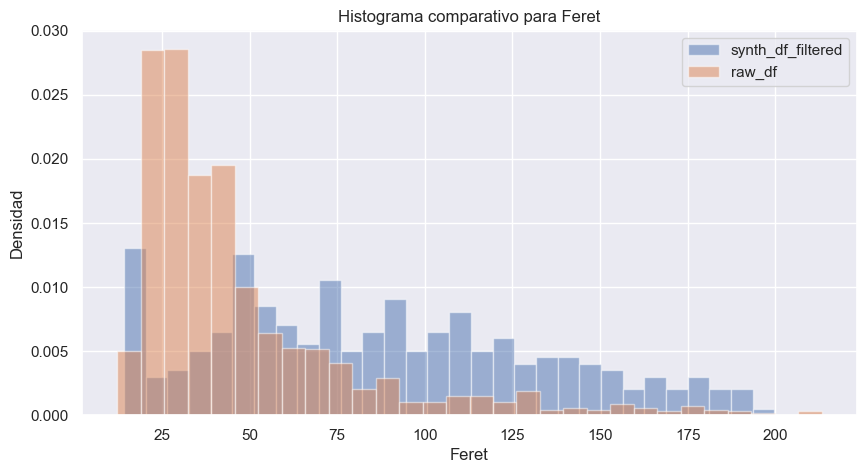

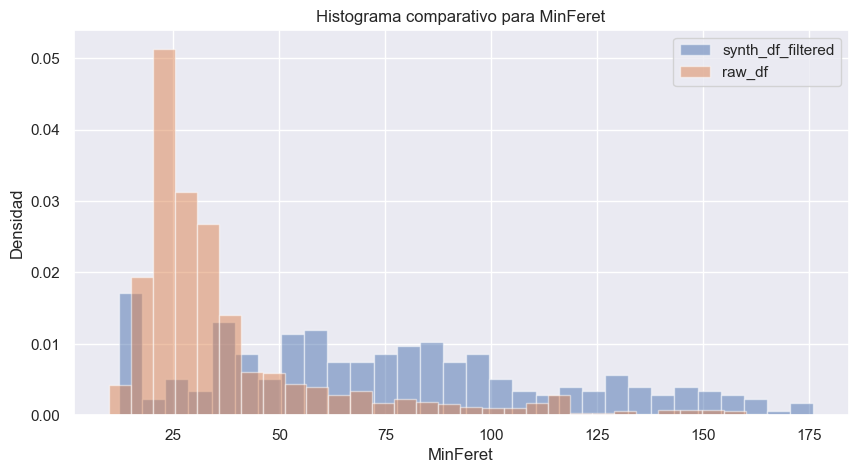

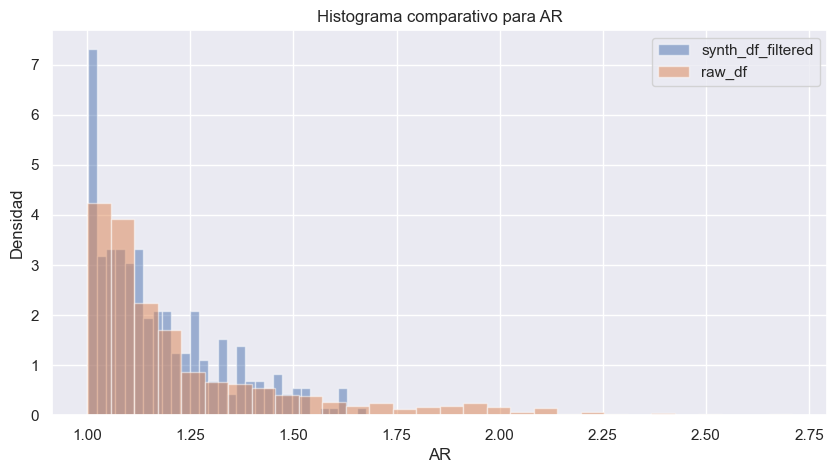

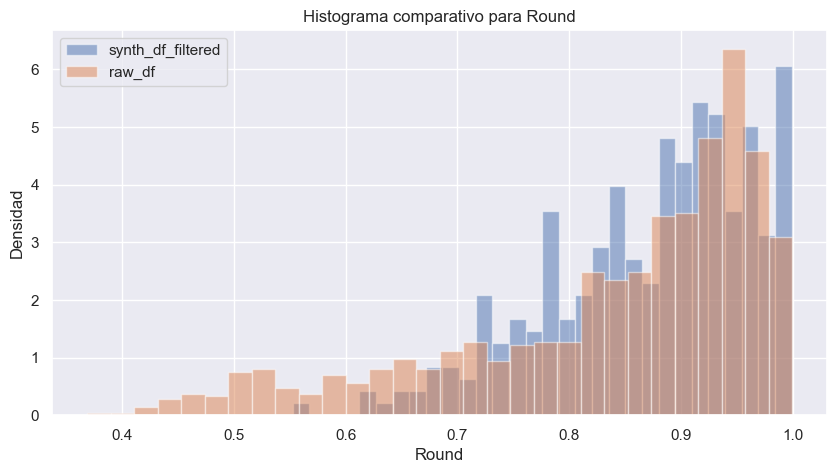

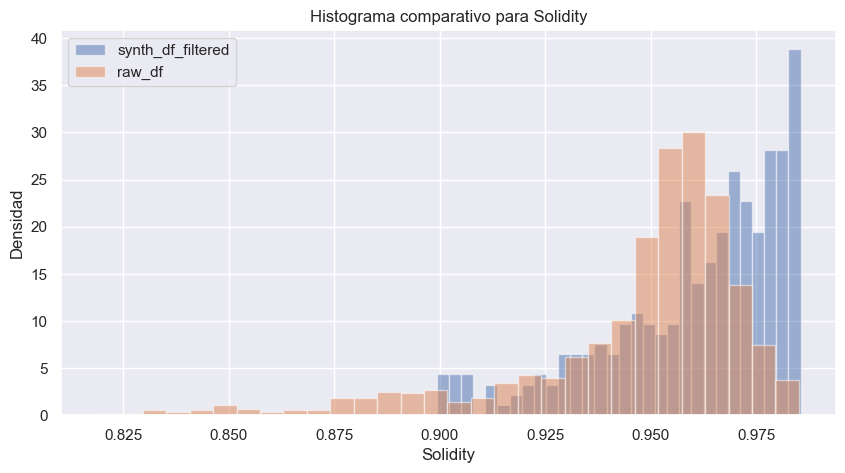

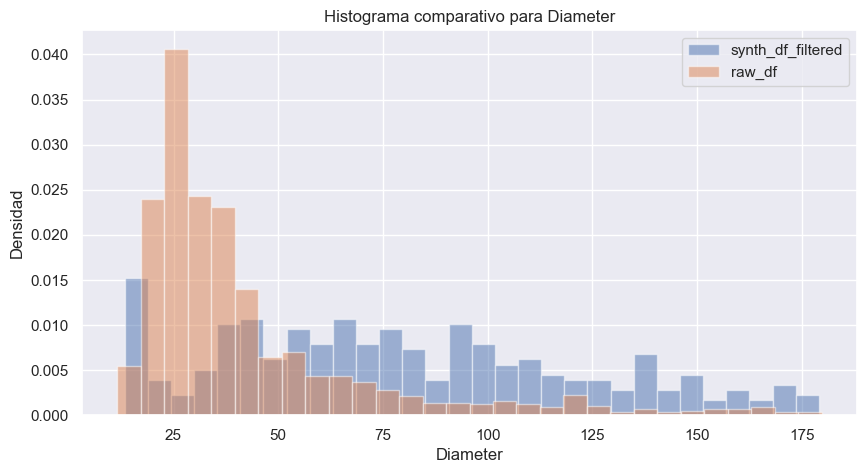

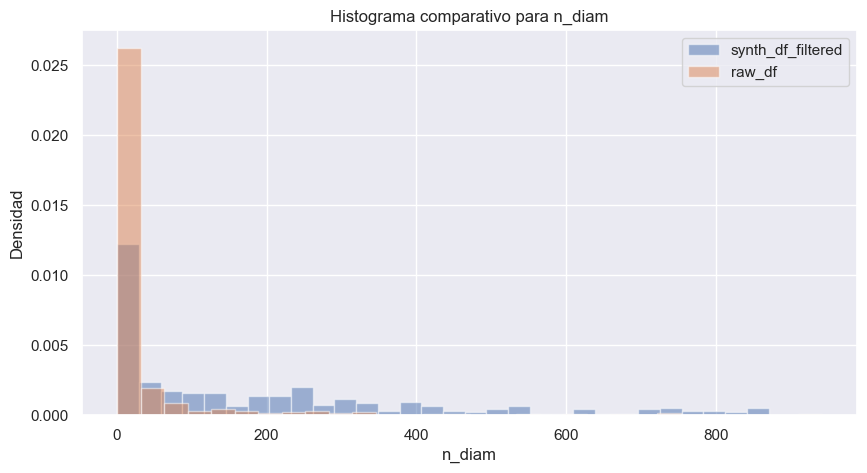

In [21]:
# Configurar las propiedades del histograma
hist_kwargs = {
    'alpha': 0.5,  # Transparencia
    'bins': 30,    # Número de bins
    'density': True  # Normalización para que la integral sea 1
}

# Crear un subplot para cada columna en cols
for col in cols_syn:
    plt.figure(figsize=(10, 5))  # Tamaño del gráfico
    plt.hist(synth_df_filtered[col], label='synth_df_filtered', **hist_kwargs)
    plt.hist(raw_df[col], label='raw_df', **hist_kwargs)
    
    # Configurar etiquetas y leyendas
    plt.xlabel(col)
    plt.ylabel('Densidad')
    plt.legend()
    
    # Mostrar el gráfico
    plt.title(f'Histograma comparativo para {col}')
    plt.show()

Como puede observarse en estas comparaciones, los datos sintéticos y los datos reales difieren en general en cuanto al tipo de distribución de los valores en sí. Sólo en las variables n_diam, AR, Round y Area las distribuciones son similares, pero sin embargo se observan diferencias entre los valores de cada uno.

No obstante, a los fines de sumar los datos sintéticos a los datos originales para afrontar el problema de clasificación con un mayor volumen de datos, por un lado eliminaremos todos aquellos registros donde esferoide tome como valor 'no' y por el otro concatenaremos ambos df.

In [22]:
# Filtramos aquellos registros donde Esferoide = 'no'
synth_df_filtered = synth_df_filtered[synth_df_filtered['Esferoide'] != 'no']

# Corroboramos el código
print(synth_df_filtered['Esferoide'].unique())

['si']


In [23]:
# Concatenamos synth_df_filtered a raw_df
combined_df = pd.concat([raw_df, synth_df_filtered], ignore_index=True)

# Verificamos si la concatenación fue exitosa
combined_df.sample(n=10, random_state=42)

,labels,Area,X,Y,XM,YM,Perim.,BX,BY,Width,...,FeretY,FeretAngle,MinFeret,AR,Round,Solidity,Esferoide,dia,Diameter,n_diam
541,Esferas_BT474_dia_2_well_2_100X_2_blob_1,467.0516,1691.1089,24.1464,1691.1089,24.1464,82.3059,1679.3478,10.8696,23.0978,...,53.0,54.4623,21.3648,1.3462,0.7428,0.9556,no,2,25.292350,2.621797
259,Esferas_BT474_dia_1_well_1_100X_2_blob_24,510.8954,1063.6166,1048.3537,1063.6166,1048.3537,100.3269,1050.2717,1033.9674,27.8533,...,1525.0,145.6698,23.3889,1.2738,0.7851,0.8824,si,1,28.558850,3.774450
43,Esferas_BT474_dia_0_well_2_100X_1_blob_26,380.2871,1618.2552,532.7456,1618.2552,532.7456,72.3971,1606.6576,522.4185,23.7772,...,776.0,162.0721,20.3804,1.1593,0.8626,0.9570,si,0,22.328500,1.803890
1005,Esferas_BT474_dia_7_well_2_100X_2_blob_3,423.2079,259.7713,338.0600,259.7713,338.0600,80.6458,248.6413,322.6902,22.4185,...,475.0,96.9530,22.1784,1.1627,0.8601,0.9235,no,7,25.119000,2.568257
584,Esferas_BT474_dia_2_well_2_100X_1_blob_29,6397.4997,1038.2572,942.4096,1038.2572,942.4096,345.4198,995.9239,896.0598,94.4293,...,1440.0,35.4956,89.5143,1.0039,0.9962,0.9306,no,2,98.577000,155.223800
310,Esferas_BT474_dia_1_well_1_100X_1_blob_77,2566.9379,1153.3720,751.8219,1153.3720,751.8219,198.4993,1124.3207,718.7500,60.4620,...,1059.0,118.7866,46.5763,1.5227,0.6567,0.9641,si,1,58.557050,32.536369
657,Esferas_BT474_dia_4_well_1_100X_13_blob_4,1319.9285,603.6364,397.3448,603.6364,397.3448,137.2731,581.5217,378.3967,44.1576,...,572.0,158.3556,38.3165,1.2085,0.8274,0.9683,si,4,42.181050,12.161403
1209,0001n,5369.9451,NaN,NaN,NaN,NaN,239.1335,NaN,NaN,NaN,...,NaN,NaN,66.6037,1.1255,0.8885,0.9798,si,4,64.070012,96.770368
210,Esferas_BT474_dia_1_well_2_100X_3_blob_33,433.3611,742.5456,549.0270,742.5456,549.0270,77.5988,730.2989,537.3641,24.4565,...,823.0,49.3987,23.0978,1.0565,0.9465,0.9533,si,1,24.075450,2.261282
155,Esferas_BT474_dia_1_well_2_100X_2_blob_79,855.6460,1287.1446,1047.0304,1287.1446,1047.0304,113.8456,1271.7391,1029.8913,33.2880,...,1518.0,122.4712,33.0684,1.0796,0.9263,0.9515,si,1,34.249400,6.510141


In [24]:
# Filtramos por las columnas de interés
combined_df_selected = combined_df[selected_cols]
combined_df_selected

,labels,dia,Area,Perim.,Feret,MinFeret,Circ.,Round,Solidity,Esferoide
0,Esferas_BT474_dia_0_well_1_100X_1_blob_1,0,324.4440,67.3603,22.211700,19.7011,0.898500,0.9387,0.9500,si
1,Esferas_BT474_dia_0_well_1_100X_1_blob_2,0,497.5115,82.8004,26.875100,25.1289,0.911900,0.9546,0.9569,si
2,Esferas_BT474_dia_0_well_1_100X_1_blob_3,0,282.9078,62.1586,20.437000,18.3424,0.920100,0.9620,0.9519,si
3,Esferas_BT474_dia_0_well_1_100X_1_blob_5,0,500.7421,84.5571,26.633600,25.1359,0.880100,0.9730,0.9493,si
4,Esferas_BT474_dia_0_well_1_100X_1_blob_6,0,492.8964,82.0728,26.223200,24.4565,0.919500,0.9817,0.9643,si
...,...,...,...,...,...,...,...,...,...,...
1211,0001p,4,14088.9333,514.8630,154.153917,149.2275,0.756727,0.9721,0.9806,si
1212,0001q,4,3779.9797,265.8576,90.280335,79.7496,0.872219,0.8566,0.9752,si
1213,0001r,4,1135.0017,185.2046,58.616037,53.4563,0.908524,0.9202,0.9725,si
1214,0001s,4,1107.0123,147.4640,49.745131,40.4382,0.825286,0.8946,0.9613,si


## 4. Clasificación

**Consigna:** 

Elegir uno de las siguientes situaciones y generar su correspondiente dataset (leer hasta el final del enunciado antes de generarlos):

* Tomar todo el dataset.

* Realizar clasificación con solo los datos del día 3, 4 y 5.

* Tomar solo los días 3,4 y 5 y sumar los datos sintéticos.
  
* Utilizando sólo PCA (si quieren de todos días o solo de los días 3,4 y 5, con o sin datos sintéticos) pero indicar cuál se tomó.

---

Vamos a tomar todo el dataset (datos originales hasta el día 5) para generar la clasificación en esferoide 'si' y 'no'.

### 4.1 Situación: Días previos al 5

Eliminamos las filas que corresponden a días posteriores al quinto.

In [25]:
# X.loc[X['dia']<6]['dia'].unique()
df_5 = df.loc[df['dia']<6]
df_5

,labels,dia,Area,Perim.,Feret,MinFeret,Circ.,Round,Solidity,Esferoide
0,Esferas_BT474_dia_0_well_1_100X_1_blob_1,0,324.4440,67.3603,22.2117,19.7011,0.8985,0.9387,0.9500,1
1,Esferas_BT474_dia_0_well_1_100X_1_blob_2,0,497.5115,82.8004,26.8751,25.1289,0.9119,0.9546,0.9569,1
2,Esferas_BT474_dia_0_well_1_100X_1_blob_3,0,282.9078,62.1586,20.4370,18.3424,0.9201,0.9620,0.9519,1
3,Esferas_BT474_dia_0_well_1_100X_1_blob_5,0,500.7421,84.5571,26.6336,25.1359,0.8801,0.9730,0.9493,1
4,Esferas_BT474_dia_0_well_1_100X_1_blob_6,0,492.8964,82.0728,26.2232,24.4565,0.9195,0.9817,0.9643,1
...,...,...,...,...,...,...,...,...,...,...
935,Esferas_BT474_dia_5_well_1_100X_2_blob_8,5,1011.1760,118.7176,38.1041,35.0171,0.9016,0.9225,0.9673,0
936,Esferas_BT474_dia_5_well_1_100X_2_blob_9,5,902.7203,117.4272,41.0373,28.3419,0.8227,0.6620,0.9534,0
937,Esferas_BT474_dia_5_well_1_100X_4_blob_5,5,400.1322,75.4442,24.2481,22.4822,0.8834,0.9506,0.9507,0
938,Esferas_BT474_dia_5_well_2_100X_7_blob_1,5,1224.8567,155.5955,52.5606,35.9582,0.6358,0.6909,0.8911,0


In [26]:
# Separate features and labels
X = df_5.drop(['labels', 'Esferoide'], axis=1)
y = df_5['Esferoide']

### 4.2 Separación en Conjuntos de Entrenamiento y Evaluación

In [27]:
# We stratify according to the number of tumorspheres in each set
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state = 42, stratify=y)

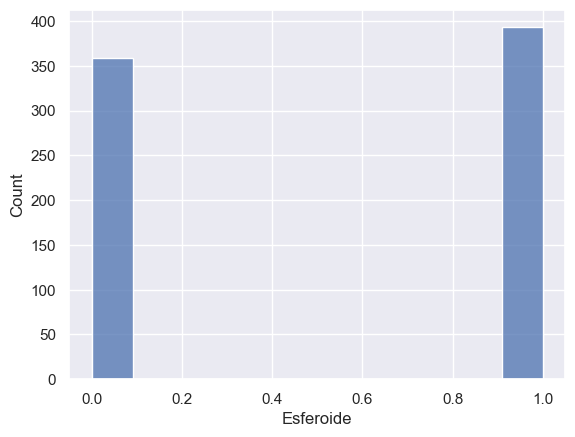

In [28]:
sns.histplot(data=y_train)
plt.show()

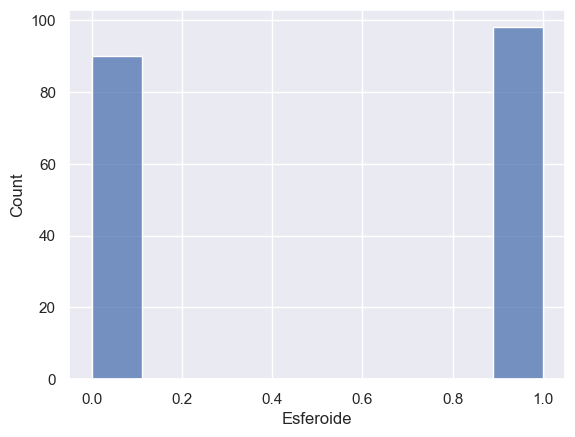

In [29]:
sns.histplot(data=y_test)
plt.show()

Como podemos ver, la separación se hizo respetando las proporciones de esferoide 'si' y 'no'.

### 4.3 Pre-procesamiento

#### 4.3.1 Outliers

Contamos el número de outliers en cada feature. Si supera el 10% de los datos, usamos RobustScaler en lugar de StandardScaler. No lo hago por día porque quiero que el scaling para la misma característica, para dos días diferentes, sea el mismo.

In [30]:
def outlier_counter(series_data):
    '''Returns the number of outliers in a pandas.Series.
    '''
    # Calculate Q1, Q3 and IQR
    Q1 = series_data.quantile(0.25)
    Q3 = series_data.quantile(0.75)
    IQR = Q3 - Q1

    # Determine bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify and count outliers
    outlier_count = ((series_data < lower_bound) | (series_data > upper_bound)).sum()
    return outlier_count

In [31]:
for_std_scaler = []
for_robust_scaler = []

for col in X_train.columns:
    # Count outliers
    outlier_count = outlier_counter(X_train[col])
    
    # We assign each column to the list of the scaler to use
    if outlier_count >= (0.1*X_train.shape[0]):
        for_robust_scaler.append(col)
    else:
        for_std_scaler.append(col)

print(for_robust_scaler)

# we remove 'dia' from the std list
# (it's already ordinaly encoded)
for_std_scaler.remove('dia')
print(for_std_scaler)

['Area', 'Perim.', 'MinFeret', 'Solidity']
['Feret', 'Circ.', 'Round']


In [32]:
# We create the Scaler objects
std_scaler = StandardScaler()
rob_scaler = RobustScaler()

# fit_transform only on numerical columns
X_train[for_std_scaler] = std_scaler.fit_transform(X_train[for_std_scaler])
X_train[for_robust_scaler] = rob_scaler.fit_transform(X_train[for_robust_scaler])

X_test[for_std_scaler] = std_scaler.transform(X_test[for_std_scaler])
X_test[for_robust_scaler] = rob_scaler.transform(X_test[for_robust_scaler])


print(X_train, X_test)

     dia       Area    Perim.     Feret  MinFeret     Circ.     Round  \
733    4  -0.459249 -0.579099 -0.750843 -0.549139  0.843645  0.571290   
553    2  -0.430880 -0.549965 -0.749904 -0.463274  1.033313  0.899020   
595    3   1.936752  1.787799  0.936701  1.377972 -2.576525 -1.588497   
360    1  -0.003953 -0.027558 -0.331354  0.051919  0.120857  0.050156   
555    2  -0.240670 -0.302214 -0.534920 -0.270043  0.638599 -0.010327   
..   ...        ...       ...       ...       ...       ...       ...   
88     0  -0.036972  0.162849 -0.184605 -0.324279 -2.056733 -2.200355   
161    1  -0.302523 -0.364940 -0.586842 -0.389119  0.536076 -0.161533   
901    5  13.687943  6.391308  3.703761  6.524559 -3.074787  0.188703   
218    1   0.064411  0.046313 -0.212342 -0.100638 -0.010372 -1.185515   
55     0  -0.474131 -0.599701 -0.776399 -0.592075  0.838519  0.472127   

     Solidity  
733  0.056373  
553  0.159314  
595 -3.507353  
360 -0.183824  
555  0.012255  
..        ...  
88  -3.1642

#### 4.3.2 Medidas de Esfericidad

Solidity, Round y Circ. contienen información que podría ser similar. Las opciones son no hacer nada, o probar quedarse con una o dos componentes de LDA.

In [33]:
# I'm going to try all options latter with the Pipeline,
# for now, I'll try an LDA with all variables in the next section.

#### 4.3.3 Medidas de Tamaño

Area, Perim., Feret y MinFeret, son medidas de tamaño con significados en principio diferentes. Sin embargo, podríamos probar haciendo PCA, LDA, o nada.

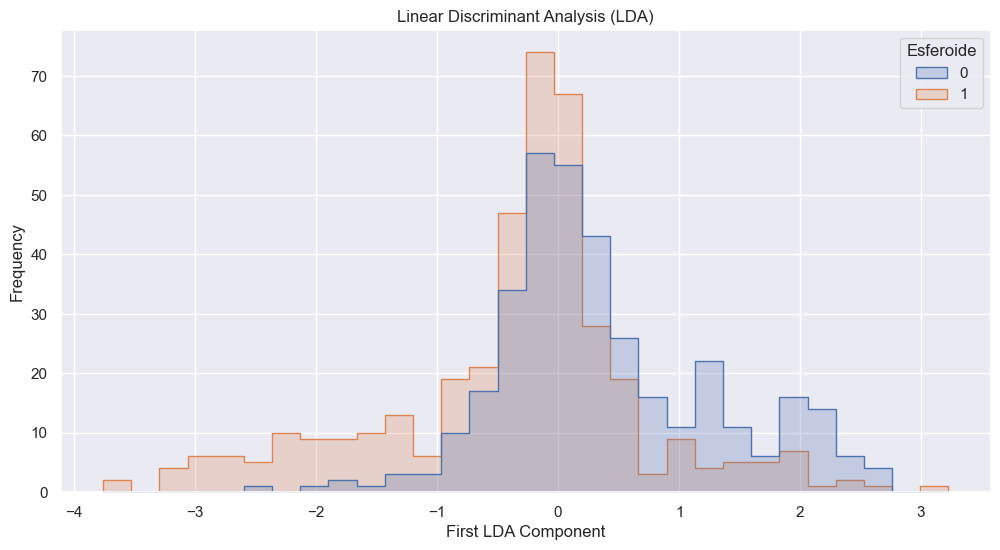

In [34]:
# Let's do here the LDA for all variables except day.
# However, let's try with a single component first:

# Drop the 'dia' column from X_pre
X_pre = X_train.drop(['dia'], axis=1)

# Perform LDA
lda_single_comp = LinearDiscriminantAnalysis(n_components=1)
X_lda_single_comp = lda_single_comp.fit_transform(X_pre, y_train)

# Convert to DataFrame for easier plotting
df_lda_single_comp = pd.DataFrame(data=X_lda_single_comp, columns=['First Component'])
df_lda_single_comp['Esferoide'] = y_train.reset_index(drop=True)  # Reset index to ensure alignment

# Plotting
plt.figure(figsize=(12, 6))

sns.histplot(data=df_lda_single_comp, x='First Component', hue='Esferoide', bins=30, element='step')
plt.xlabel('First LDA Component')
plt.ylabel('Frequency')
plt.title('Linear Discriminant Analysis (LDA)')
plt.show()


Notar que esto es otra prueba de la no separabilidad lineal de los datos. Dado que tenemos dos clases, si queremos más componentes tenemos que pasar a PCA o hacer LDA con subconjuntos de las variables. Por ahora, pasemos a ver si hay alguna forma de separar fácil usando todo. Las otras formas las probamos después en el grid search del pipeline.

Principal Components:
[[ 0.81762319  0.33301988  0.23690467  0.39677572 -0.07906316 -0.01338523
   0.02459952]
 [-0.07420623  0.08686897  0.08195937 -0.04341018 -0.51436972 -0.46537397
  -0.70512148]]


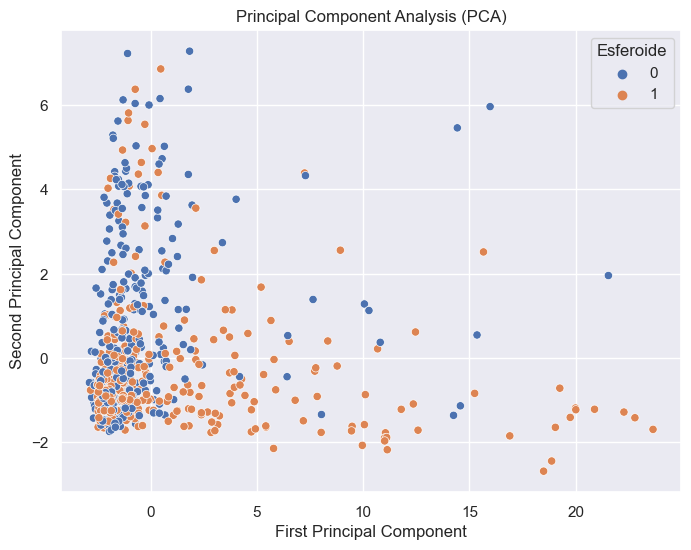

In [35]:
# Copy of X_pre
X_pre_filtered = X_pre

# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_pre_filtered)

# Accessing the components
print("Principal Components:")
print(pca.components_)

# Convert to DataFrame for easier plotting
df_pca = pd.DataFrame(data=X_pca, columns=['First Component', 'Second Component'])
df_pca['Esferoide'] = y_train.reset_index(drop=True)  # Reset index for proper alignment

# Plotting
plt.figure(figsize=(8, 6))

sns.scatterplot(x='First Component', y='Second Component', hue='Esferoide', data=df_pca)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('Principal Component Analysis (PCA)')
plt.grid(True)
plt.show()


Esto es parecido a lo que habíamos obtenido en el entregable de visualización. Veamos si usar algún kernel lo vuelve más separable (a ojo al menos).

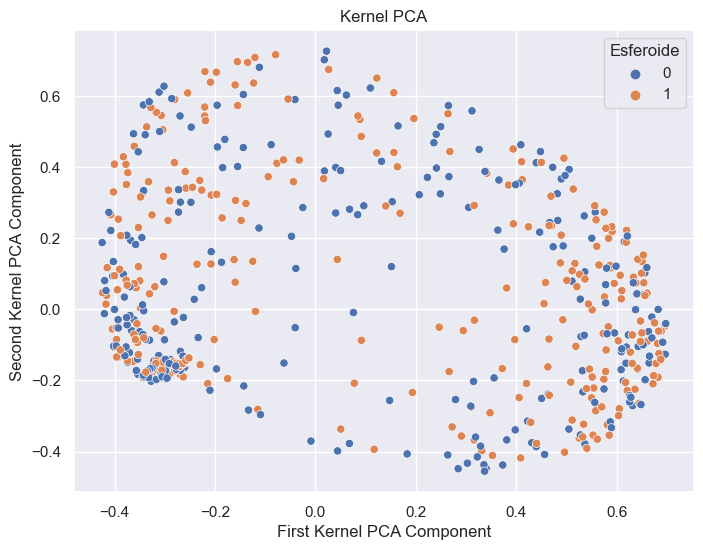

In [36]:
# Copy of X_pre
X_pre_filtered = X_pre

# Perform Kernel PCA
kpca = KernelPCA(n_components=2, kernel='rbf', gamma=1)
X_kpca = kpca.fit_transform(X_pre_filtered)

# Convert to DataFrame for easier plotting
df_kpca = pd.DataFrame(data=X_kpca, columns=['First Component', 'Second Component'])
df_kpca['Esferoide'] = y_train.reset_index(drop=True)  # Reset index for proper alignment

# Plotting
plt.figure(figsize=(8, 6))

sns.scatterplot(x='First Component', y='Second Component', hue='Esferoide', data=df_kpca)
plt.xlabel('First Kernel PCA Component')
plt.ylabel('Second Kernel PCA Component')
plt.title('Kernel PCA')
plt.grid(True)
plt.show()


### 4.4 Modelo

#### 4.4.1 Random Forest

Comencemos armando un baseline con un random forest sobre el dataset sin transformar.

In [37]:
# Initialize the Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Random Forest Classifier on the training data
rf_clf.fit(X_train, y_train)

# Perform prediction on the test set
y_pred = rf_clf.predict(X_test)

# Evaluate the model
print("Accuracy Score:", accuracy_score(y_test, y_pred)*100)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Feature Importances
feature_importances = rf_clf.feature_importances_
feature_names = X_train.columns
print("\nFeature Importances:")
for name, importance in zip(feature_names, feature_importances):
    print(f"{name}: {importance:.4f}")


Accuracy Score: 82.4468085106383

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.76      0.80        90
           1       0.80      0.89      0.84        98

    accuracy                           0.82       188
   macro avg       0.83      0.82      0.82       188
weighted avg       0.83      0.82      0.82       188


Feature Importances:
dia: 0.3047
Area: 0.1033
Perim.: 0.0874
Feret: 0.0950
MinFeret: 0.1008
Circ.: 0.1041
Round: 0.1042
Solidity: 0.1005


Si bien los resultados son aceptables, evaluemos distitos modelos.

In [38]:
clfs = [
    DecisionTreeClassifier(random_state= 1 ),
    LogisticRegression(),
    MLPClassifier(random_state=1),
    XGBClassifier(random_state=1),
    GaussianNB(),
    LinearSVC(random_state=1)
]

names = ['Arbol de decisión',
         'Regresión Logística',
         'Perceptrón multicapa',
         'XGBoost',
         'Naive Bayes',
         'SVM']

trained_models = []
accuracy_models = []

for clf, name in zip(clfs, names):
    print(name)
    clf.fit(X_train, y_train)
    train_predictions = clf.predict(X_train)
    accuracy_train = accuracy_score(y_train, train_predictions)
    print(f"Accuracy train {name}: %.2f%%" % (accuracy_train * 100.0))

    test_predictions = clf.predict(X_test)
    accuracy_test = accuracy_score(y_test, test_predictions)
    print(f"Accuracy test {name}: %.2f%%" % (accuracy_test * 100.0))
    print('----------------------------------------')

    trained_models.append(clf)
    accuracy_models.append(accuracy_test * 100)

Arbol de decisión
Accuracy train Arbol de decisión: 100.00%
Accuracy test Arbol de decisión: 80.85%
----------------------------------------
Regresión Logística
Accuracy train Regresión Logística: 83.38%
Accuracy test Regresión Logística: 81.91%
----------------------------------------
Perceptrón multicapa
Accuracy train Perceptrón multicapa: 85.11%
Accuracy test Perceptrón multicapa: 84.04%
----------------------------------------
XGBoost
Accuracy train XGBoost: 100.00%
Accuracy test XGBoost: 82.98%
----------------------------------------
Naive Bayes
Accuracy train Naive Bayes: 75.00%
Accuracy test Naive Bayes: 72.87%
----------------------------------------
SVM
Accuracy train SVM: 83.11%
Accuracy test SVM: 81.91%
----------------------------------------


In [39]:
models = pd.DataFrame({'Model':names, 'Score':accuracy_models})
models.sort_values(by='Score', ascending=False)

,Model,Score
2,Perceptrón multicapa,84.042553
3,XGBoost,82.978723
1,Regresión Logística,81.914894
5,SVM,81.914894
0,Arbol de decisión,80.851064
4,Naive Bayes,72.872340


Tanto Random Forest como Perceptrón Multicapa son modelos que tienen la capacidad de manejar problemas de clasificación en los cuales los datos no son linealmente separables. Estos dos modelos son los que nos ofrecen mejor accuracy para el grupo de testeo. No obstante, antes de continuar profundizando en el problema de clasificación, analicemos qué sucede con los datos según el día con técnicas de embedding

### ANS

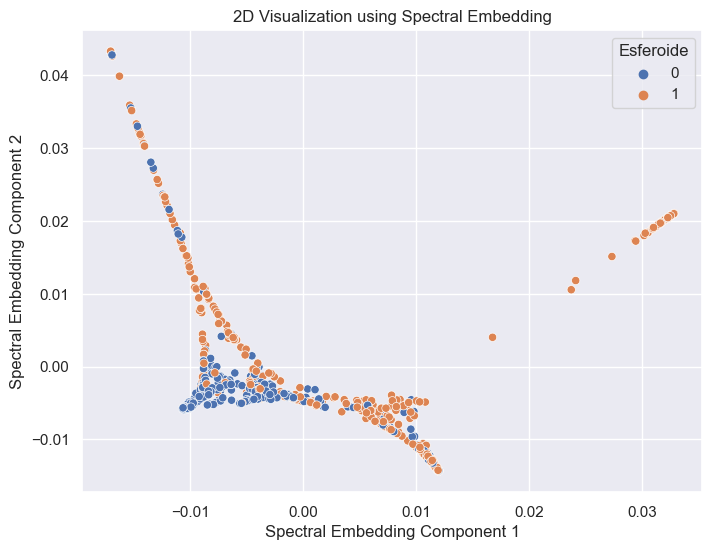

In [40]:
# Apply Spectral Embedding
embedding = SpectralEmbedding(n_components=2, affinity='nearest_neighbors', n_neighbors=10)
X_transformed = embedding.fit_transform(X_train)

# Convert to DataFrame for easier plotting
df_transformed = pd.DataFrame(X_transformed, columns=['Component 1', 'Component 2'])
df_transformed['Esferoide'] = y_train.reset_index(drop=True)  # Reset index for alignment

# 2D Visualization
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Component 1', y='Component 2', hue='Esferoide', data=df_transformed)
plt.xlabel('Spectral Embedding Component 1')
plt.ylabel('Spectral Embedding Component 2')
plt.title('2D Visualization using Spectral Embedding')
plt.grid(True)
plt.show()


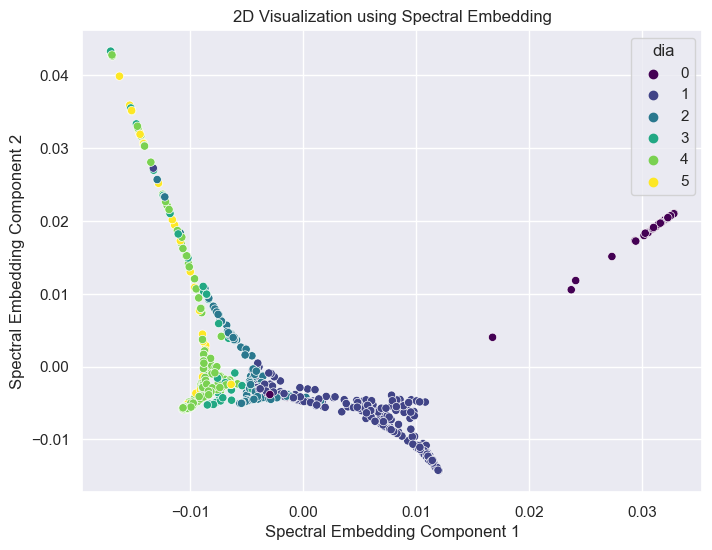

In [41]:
# Apply Spectral Embedding
embedding = SpectralEmbedding(n_components=2, affinity='nearest_neighbors', n_neighbors=10)
X_transformed = embedding.fit_transform(X_train)

# Convert to DataFrame for easier plotting
df_transformed = pd.DataFrame(X_transformed, columns=['Component 1', 'Component 2'])
df_transformed['dia'] = X_train['dia'].reset_index(drop=True)  # Add 'dia' column after resetting index

# 2D Visualization
plt.figure(figsize=(8, 6))
scatter = sns.scatterplot(x='Component 1', y='Component 2', hue='dia', palette='viridis', data=df_transformed)
plt.xlabel('Spectral Embedding Component 1')
plt.ylabel('Spectral Embedding Component 2')
plt.title('2D Visualization using Spectral Embedding')
plt.grid(True)

# Agregar una barra de colores (colorbar)
plt.legend(title='dia')
plt.show()


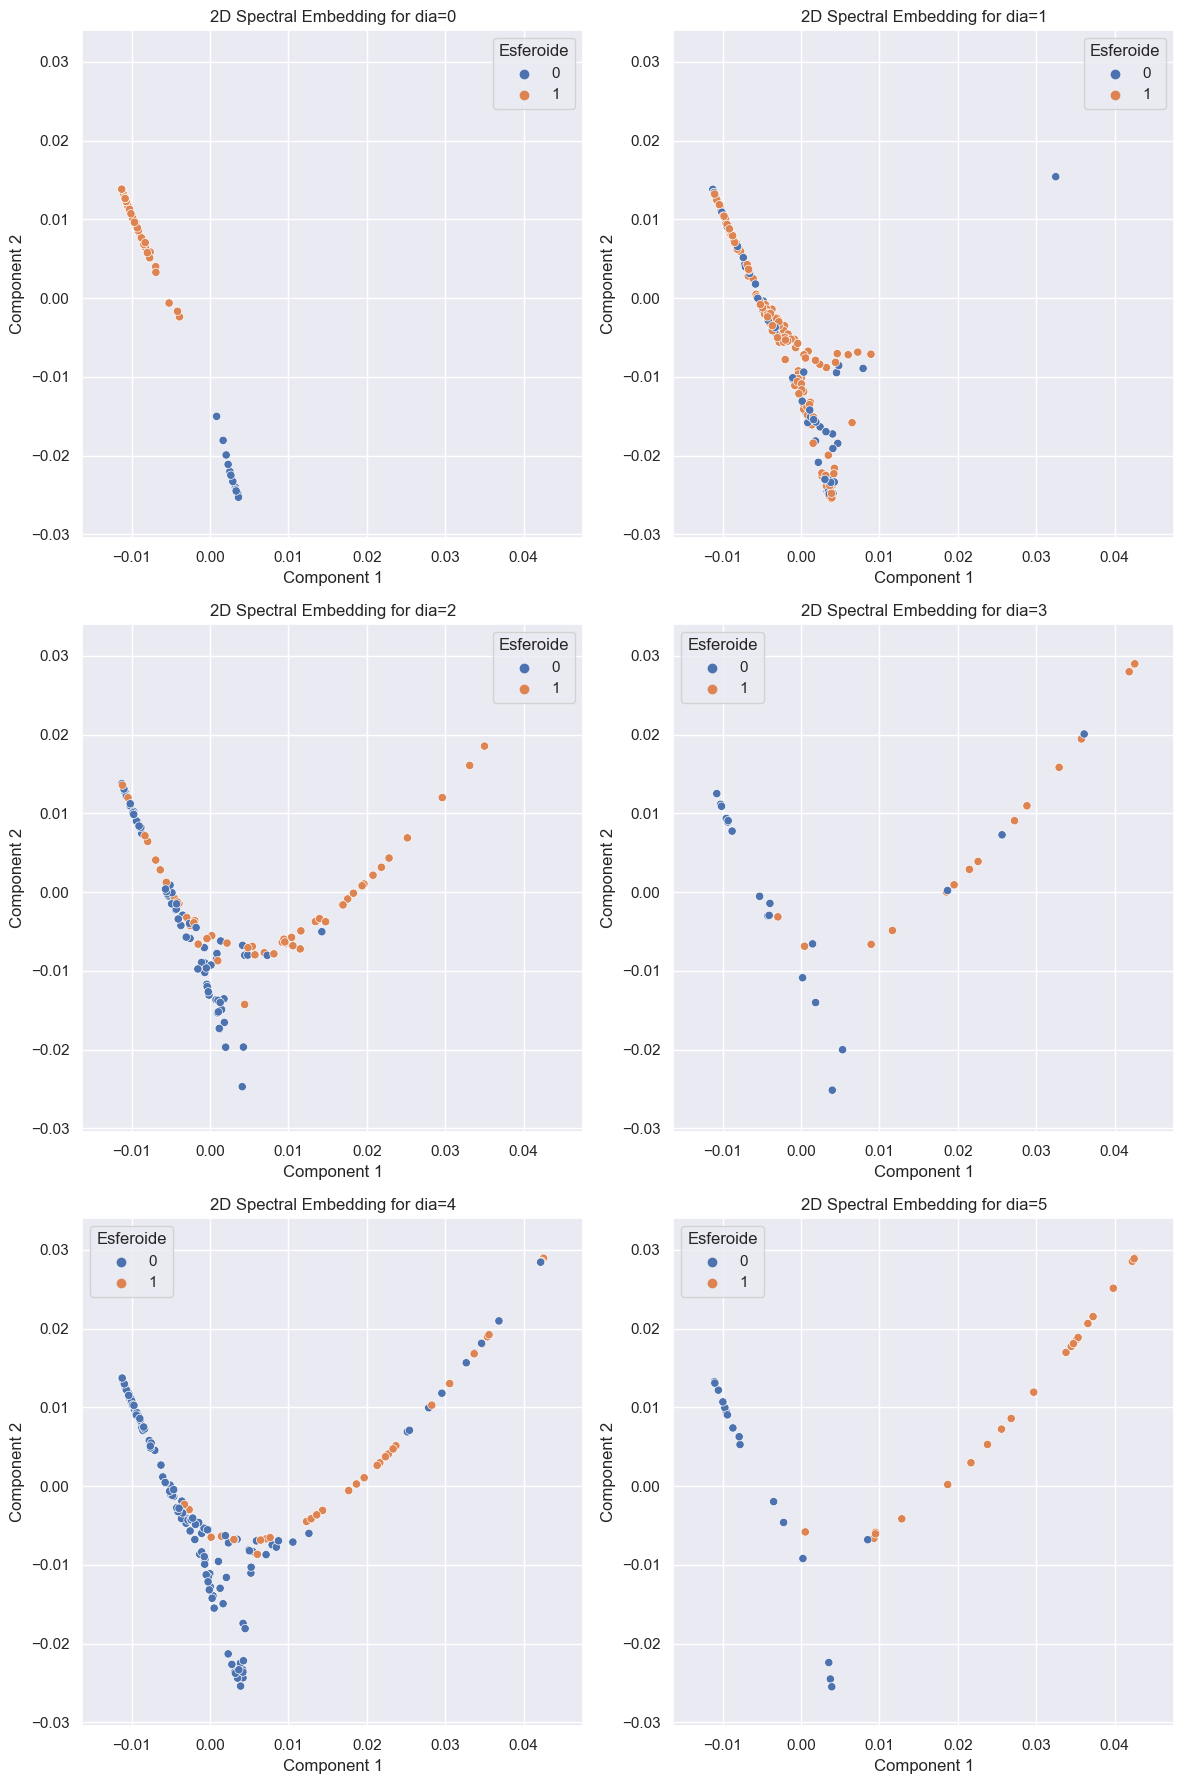

In [42]:
# Drop the 'dia' column from X_pre for Spectral Embedding
X_pre_filtered = X_train.drop(['dia'], axis=1)

# Apply Spectral Embedding
embedding = SpectralEmbedding(n_components=2, affinity='nearest_neighbors', n_neighbors=10)
X_transformed = embedding.fit_transform(X_pre_filtered)

# Convert to DataFrame for easier plotting
df_transformed = pd.DataFrame(X_transformed, columns=['Component 1', 'Component 2'])
df_transformed['Esferoide'] = y_train.reset_index(drop=True)  # Add 'Esferoide' column after resetting index
df_transformed['dia'] = X_train['dia'].reset_index(drop=True)  # Add 'dia' column after resetting index

# Initialize plot
fig, axes = plt.subplots(3, 2, figsize=(12, 18))

# Flatten axes for easier indexing
axes = axes.flatten()

# Determine the limits for the axes based on the transformed data
margin = 0.005
x_min, x_max = df_transformed['Component 1'].min()-margin, df_transformed['Component 1'].max()+margin
y_min, y_max = df_transformed['Component 2'].min()-margin, df_transformed['Component 2'].max()+margin

# Loop through each 'dia' value and plot
for i in range(6):
    subset = df_transformed[df_transformed['dia'] == i]
    sns.scatterplot(x='Component 1', y='Component 2', hue='Esferoide', data=subset, ax=axes[i])
    axes[i].set_title(f'2D Spectral Embedding for dia={i}')
    axes[i].grid(True)
    axes[i].set_xlim([x_min, x_max])
    axes[i].set_ylim([y_min, y_max])

plt.tight_layout()
plt.show()


De aquí podemos ver que para los días 3, 4 y 5 los datos de esferoides son linealmente separables. Esto se puede comprender teniendo en cuenta la dificultad de diferenciar tumoresferas en los sus primeros días.

### 4.2 Realizar clasificación con solo los datos del día 3, 4 y 5.

Decidimos continuar entrenando modelos de clasificación pero para los días 3,4 y 5. De todo lo visto y analizado para las variables de nuestro dataset, decidimos continuar la tarea de clasificación con las variables "Area", "Circ.", "Round" y "Diameter"

#### 4.2.1 Preparación de los datos

In [43]:
selected_cols = [
    #"labels",
    "dia",
    "Area",
    #"Perim.",
    # "Width",
    # "Height",
    #"Feret",
    # "FeretAngle",
    #"MinFeret",
    # "AR",
    "Circ.",
    "Round",
    #"Solidity",
    "Esferoide",
     "Diameter",
    # "n_diam",
]

df = raw_df[selected_cols]
df.head()

,dia,Area,Circ.,Round,Esferoide,Diameter
0,0,324.4440,0.8985,0.9387,si,20.95640
1,0,497.5115,0.9119,0.9546,si,26.00200
2,0,282.9078,0.9201,0.9620,si,19.38970
3,0,500.7421,0.8801,0.9730,si,25.88475
4,0,492.8964,0.9195,0.9817,si,25.33985


In [44]:
df_filter = df.copy()

df_filter = df.loc[(df['dia'] > 2) & (df['dia'] < 6)]
df_filter.head()

,dia,Area,Circ.,Round,Esferoide,Diameter
591,3,4635.9028,0.7960,0.8392,si,78.82640
592,3,5901.8342,0.8565,0.9533,si,87.74420
593,3,11259.0826,0.8459,0.9699,si,122.97820
594,3,22344.1746,0.8151,0.7434,si,173.24380
595,3,2700.3153,0.5813,0.6096,no,63.88875


In [45]:
df_filter['Esferoide'] = df_filter['Esferoide'].map({'si': 1, 'no': 0})

In [46]:
# Separate features and labels
X2 = df_filter.drop(['Esferoide', 'dia'], axis=1)
y2 = df_filter['Esferoide']

In [47]:
# We stratify according to the number of tumorspheres in each set
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X2, y2, train_size=0.8, random_state = 42, stratify=y2)

In [48]:
for_std_scaler = []
for_robust_scaler = []

for col in X_train_2.columns:
    # Count outliers
    outlier_count = outlier_counter(X_train_2[col])
    
    # We assign each column to the list of the scaler to use
    if outlier_count >= (0.1*X_train_2.shape[0]):
        for_robust_scaler.append(col)
    else:
        for_std_scaler.append(col)

print(for_robust_scaler)

# we remove 'dia' from the std list
# (it's already ordinaly encoded)

print(for_std_scaler)

['Area']
['Circ.', 'Round', 'Diameter']


In [49]:
# We create the Scaler objects
std_scaler = StandardScaler()
rob_scaler = RobustScaler()

# fit_transform only on numerical columns
X_train_2[for_std_scaler] = std_scaler.fit_transform(X_train_2[for_std_scaler])
X_train_2[for_robust_scaler] = rob_scaler.fit_transform(X_train_2[for_robust_scaler])

X_test_2[for_std_scaler] = std_scaler.transform(X_test_2[for_std_scaler])
X_test_2[for_robust_scaler] = rob_scaler.transform(X_test_2[for_robust_scaler])

X_train_2.head(100)

,Area,Circ.,Round,Diameter
876,-0.086736,-1.944499,-2.804425,-0.482424
702,-0.234311,0.658736,0.418095,-0.851563
599,2.483831,0.185516,0.396133,1.376262
724,0.116196,0.437408,0.188337,-0.287679
674,0.423952,0.466919,0.127519,0.061951
...,...,...,...,...
838,4.056728,-1.174068,-0.727315,2.095696
676,-0.194026,0.966487,0.973906,-0.763310
764,0.246369,-0.468981,0.763576,-0.113690
794,-0.187175,-0.953794,-2.920993,-0.728553


#### 4.2.2 Modelos

In [50]:
clfs = [
    DecisionTreeClassifier(random_state= 1 ),
    RandomForestClassifier(random_state= 1),
    LogisticRegression(),
    MLPClassifier(random_state=1),
    XGBClassifier(random_state=1),
    GaussianNB(),
    LinearSVC(random_state=1)
]

names = ['Arbol de decisión',
         'Random Forest',
         'Regresión Logística',
         'Perceptrón multicapa',
         'XGBoost',
         'Naive Bayes',
         'SVM']

trained_models = []
accuracy_models = []

for clf, name in zip(clfs, names):
    print(name)
    clf.fit(X_train_2, y_train_2)
    train_predictions = clf.predict(X_train_2)
    accuracy_train = accuracy_score(y_train_2, train_predictions)
    print(f"Accuracy train {name}: %.2f%%" % (accuracy_train * 100.0))

    test_predictions = clf.predict(X_test_2)
    accuracy_test = accuracy_score(y_test_2, test_predictions)
    print(f"Accuracy test {name}: %.2f%%" % (accuracy_test * 100.0))
    print('----------------------------------------')

    trained_models.append(clf)
    accuracy_models.append(accuracy_test * 100)

Arbol de decisión
Accuracy train Arbol de decisión: 100.00%
Accuracy test Arbol de decisión: 90.00%
----------------------------------------
Random Forest
Accuracy train Random Forest: 100.00%
Accuracy test Random Forest: 94.29%
----------------------------------------
Regresión Logística
Accuracy train Regresión Logística: 88.89%
Accuracy test Regresión Logística: 87.14%
----------------------------------------
Perceptrón multicapa
Accuracy train Perceptrón multicapa: 91.04%
Accuracy test Perceptrón multicapa: 94.29%
----------------------------------------
XGBoost
Accuracy train XGBoost: 100.00%
Accuracy test XGBoost: 95.71%
----------------------------------------
Naive Bayes
Accuracy train Naive Bayes: 85.66%
Accuracy test Naive Bayes: 82.86%
----------------------------------------
SVM
Accuracy train SVM: 91.76%
Accuracy test SVM: 91.43%
----------------------------------------


In [51]:
models = pd.DataFrame({'Model':names, 'Score':accuracy_models})
models.sort_values(by='Score', ascending=False)

,Model,Score
4,XGBoost,95.714286
1,Random Forest,94.285714
3,Perceptrón multicapa,94.285714
6,SVM,91.428571
0,Arbol de decisión,90.000000
2,Regresión Logística,87.142857
5,Naive Bayes,82.857143


Al entrenar el modelo teniendo en cuenta sólo los días 3, 4 y 5, podemos observar que mejora el accuracy de los datos de test para todos los modelos. Los resultados de esta clasificación no son comparables con los anteriores modelos dado que las variables utilizadas para el entrenamiento fueron modificadas.

Por otro lado, podríamos pensar que varios de los modelos sobreajustan, dado que el accuracy de los datos de entrenamiento es 100%. Esto podría mejorarse seleccionando los hiperparámetros adecuandos para el problema.

Continuemos con ese análisis para los mejores modelos.


#### 4.2.3 Ajuste de hiperparámetros

**XGBoost**

In [52]:
# Define el espacio de búsqueda de hiperparámetros para XGBoost
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 2, 3],
}

# Crea el modelo XGBoost
xgboost_model = xgb.XGBClassifier(random_state=1)

# Realiza una búsqueda en cuadrícula con validación cruzada
grid_search = GridSearchCV(xgboost_model, param_grid, cv=5, n_jobs=-1)

# Ajusta el modelo a los datos de entrenamiento
grid_search.fit(X_train_2, y_train_2)

# Muestra los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", grid_search.best_params_)

# Muestra el rendimiento del modelo en el conjunto de prueba
accuracy = grid_search.score(X_test_2, y_test_2)
accuracy_percentage = round(accuracy * 100, 2)
print(f"Accuracy en conjunto de test: {accuracy_percentage}%")

# Utiliza el modelo ajustado por la búsqueda en cuadrícula para calcular el accuracy en el conjunto de entrenamiento
train_accuracy = grid_search.score(X_train_2, y_train_2)
train_accuracy_percentage = round(train_accuracy * 100, 2)
print(f"Accuracy en conjunto de entrenamiento: {train_accuracy_percentage}%")



Mejores hiperparámetros: {'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 2, 'n_estimators': 300}
Accuracy en conjunto de test: 92.86%
Accuracy en conjunto de entrenamiento: 98.92%


In [53]:
# Obtén el mejor modelo entrenado de la búsqueda en cuadrícula
best_xgboost_model = grid_search.best_estimator_

# Realiza predicciones en el conjunto de prueba
y_pred = best_xgboost_model.predict(X_test_2)

# Calcula y muestra el informe de clasificación
classification_rep = classification_report(y_test_2, y_pred)
print("Informe de Clasificación:")
print(classification_rep)

Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95        51
           1       0.94      0.79      0.86        19

    accuracy                           0.93        70
   macro avg       0.93      0.88      0.90        70
weighted avg       0.93      0.93      0.93        70



In [66]:
# Obtén la importancia de las características
feature_importance = best_xgboost_model.feature_importances_

# Obtén los nombres de las características (si están disponibles)
feature_names = X_train_2.columns

# Imprime o muestra las importancias de características
print("Importancia de características:")
for feature_name, importance in zip(feature_names, feature_importance):
    importance_rounded = "{:.2f}".format(importance) 
    print(f"{feature_name}: {importance_rounded}")

Importancia de características:
Area: 0.59
Circ.: 0.20
Round: 0.13
Diameter: 0.08


**Random Forest**

In [ ]:
# Define el espacio de búsqueda de hiperparámetros
param_grid = {
    'n_estimators': [100, 200, 300], 
    'max_depth': [None, 10, 20, 30],  
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]  
}

# Crea el modelo Random Forest
rf = RandomForestClassifier(random_state=1)

# Realiza una búsqueda en cuadrícula con validación cruzada
grid_search = GridSearchCV(rf, param_grid, cv=5, n_jobs=-1)

# Ajusta el modelo a los datos de entrenamiento
grid_search.fit(X_train_2, y_train_2)

# Muestra los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", grid_search.best_params_)

# Muestra el rendimiento del modelo en el conjunto de prueba
accuracy = grid_search.score(X_test_2, y_test_2)
accuracy_percentage = round(accuracy * 100, 2)
print(f"Accuracy en conjunto de test: {accuracy_percentage}%")

# Utiliza el modelo ajustado por la búsqueda en cuadrícula para calcular el accuracy en el conjunto de entrenamiento
train_accuracy = grid_search.score(X_train_2, y_train_2)
train_accuracy_percentage = round(train_accuracy * 100, 2)
print(f"Accuracy en conjunto de entrenamiento: {train_accuracy_percentage}%")

In [ ]:
# Imprime el informe de clasificación en el conjunto de prueba
y_pred = grid_search.predict(X_test_2)
classification_rep = classification_report(y_test_2, y_pred)
print("Informe de Clasificación en Conjunto de Prueba:\n", classification_rep)


In [ ]:
# Obtén la importancia de las características del mejor modelo encontrado
best_rf_model = grid_search.best_estimator_
feature_importance = best_rf_model.feature_importances_

# Obtén los nombres de las características (si están disponibles)
feature_names = X_train_2.columns

# Imprime o muestra las importancias de características redondeadas a dos decimales
print("Importancia de características:")
for feature_name, importance in zip(feature_names, feature_importance):
    importance_rounded = round(importance, 2)  # Redondea a dos decimales
    print(f"{feature_name}: {importance_rounded}")


**Perceptrón multicapa**

In [ ]:
# Define el espacio de búsqueda de hiperparámetros
param_grid = {
    'hidden_layer_sizes': [(100,), (50, 50), (50, 25, 10)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001, 0.01],
}

# Crea el modelo MLP
mlp = MLPClassifier(random_state=1, max_iter=1000)

# Realiza una búsqueda en cuadrícula con validación cruzada
grid_search = GridSearchCV(mlp, param_grid, cv=5, n_jobs=-1)

# Ajusta el modelo a los datos de entrenamiento
grid_search.fit(X_train_2, y_train_2)

# Muestra los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", grid_search.best_params_)

# Muestra el rendimiento del modelo en el conjunto de prueba
accuracy = grid_search.score(X_test_2, y_test_2)
accuracy_percentage = round(accuracy * 100, 2)
print(f"Accuracy en conjunto de test: {accuracy_percentage}%")

train_accuracy = clf.score(X_train_2, y_train_2)
train_accuracy_percentage = round(train_accuracy * 100, 2)
print(f"Accuracy en conjunto de entrenamiento: {train_accuracy_percentage}%")

In [ ]:
# Imprime el informe de clasificación en el conjunto de prueba
y_pred = grid_search.predict(X_test_2)
classification_rep = classification_report(y_test_2, y_pred)
print("Informe de Clasificación en Conjunto de Prueba:\n", classification_rep)

El modelo de random forest con los hiperparámetros ajustados, logró mejorar el accuracy de los datos de test y evitar el sobreajuste del modelo, lo que demuestra ser el modelo más prometedor para una futura tarea de clasificación de tumoresferas.

## 4.3 Arbol de decisión con datos sin escalar

### 4.3.1 Arbol de decisión con diferentes niveles de profundidad

In [57]:
# Se elimina Perim., Feret y Minferet ya que son variables altamente correlacionadas
selected_cols = [
    "labels",
    #"dia",
    "Area",
    #"Perim.",
    # "Width",
    # "Height",
    #"Feret",
    # "FeretAngle",
    #"MinFeret",
    # "AR",
    "Circ.",
    "Round",
    "Solidity",
    "Esferoide",
    "Diameter",
    # "n_diam",
]

#df_tree = raw_df[selected_cols]
# Filtra los datos correspondientes a los días 3, 4 y 5
selected_days = [3, 4, 5]
df_tree = raw_df[(raw_df["dia"].isin(selected_days))][selected_cols]

features =df_tree[["Area", "Circ.", "Round", "Diameter"]]
target = df_tree["Esferoide"]


# Separar los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Implementación del modelo para diferentes profundidades
for depth in range(1, 11):  # Prueba profundidades de 1 a 10
    model = DecisionTreeClassifier(max_depth=depth)
    model.fit(X_train, y_train)

    train_accuracy = model.score(X_train, y_train)
    test_accuracy = model.score(X_test, y_test)

    print(f"Depth = {depth}: Train Accuracy = {train_accuracy:.2f}, Test Accuracy = {test_accuracy:.2f}")



Depth = 1: Train Accuracy = 0.86, Test Accuracy = 0.93
Depth = 2: Train Accuracy = 0.91, Test Accuracy = 0.91
Depth = 3: Train Accuracy = 0.92, Test Accuracy = 0.91
Depth = 4: Train Accuracy = 0.95, Test Accuracy = 0.94
Depth = 5: Train Accuracy = 0.97, Test Accuracy = 0.90
Depth = 6: Train Accuracy = 0.99, Test Accuracy = 0.91
Depth = 7: Train Accuracy = 0.99, Test Accuracy = 0.91
Depth = 8: Train Accuracy = 1.00, Test Accuracy = 0.93
Depth = 9: Train Accuracy = 1.00, Test Accuracy = 0.91
Depth = 10: Train Accuracy = 1.00, Test Accuracy = 0.91


### 4.3.2 Arbol de decisión con criterio de entropía

In [58]:
model = DecisionTreeClassifier(criterion = 'entropy')
model.fit(X_train, y_train)

train_accuracy = model.score(X_train, y_train)
test_accuracy = model.score(X_test, y_test)

print(f"Depth = {depth}: Train Accuracy = {train_accuracy:.2f}, Test Accuracy = {test_accuracy:.2f}")

Depth = 10: Train Accuracy = 1.00, Test Accuracy = 0.91


Mejores hiperparámetros encontrados:
{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 4}
Test Accuracy del mejor modelo: 0.93


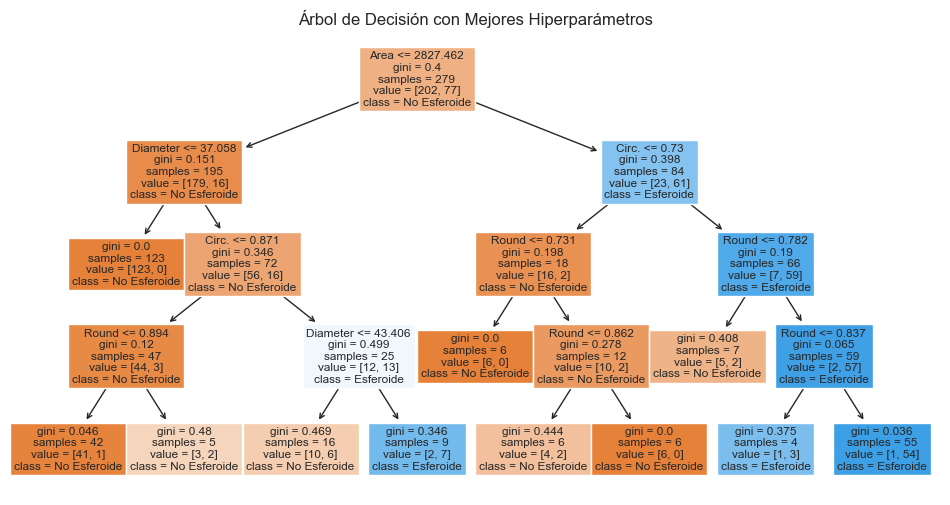


Importancia de características:
    Feature  Importance
0      Area    0.556489
1     Circ.    0.275576
2     Round    0.095353
3  Diameter    0.072582


In [59]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV, train_test_split
import pandas as pd

# Tu código existente para cargar y preparar los datos
features = df_tree[["Area", "Circ.", "Round", "Diameter"]]
target = df_tree["Esferoide"]
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Define el espacio de búsqueda de hiperparámetros
param_grid = {
    'max_depth': [1, 2, 3, 4, 5],
    'min_samples_leaf': [1, 2, 4, 8],
    'criterion': ['gini', 'entropy']
}

# Define la métrica de evaluación
scoring = 'accuracy'

# Crea el modelo de Árbol de Decisión
dtree = DecisionTreeClassifier()

# Realiza la búsqueda de cuadrícula
grid_search = GridSearchCV(dtree, param_grid, scoring=scoring, cv=5)
grid_search.fit(X_train, y_train)

# Obtiene el mejor modelo y sus hiperparámetros
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Evalúa el mejor modelo en datos de prueba
test_accuracy = best_model.score(X_test, y_test)

# Imprime los resultados de la búsqueda de hiperparámetros
print("Mejores hiperparámetros encontrados:")
print(best_params)
print(f"Test Accuracy del mejor modelo: {test_accuracy:.2f}")

# Genera el gráfico del árbol con los mejores hiperparámetros
plt.figure(figsize=(12, 6))
plot_tree(best_model, feature_names=features.columns, class_names=["No Esferoide", "Esferoide"], filled=True)
plt.title("Árbol de Decisión con Mejores Hiperparámetros")
plt.show()

# Obtener la importancia de las características
feature_importance = best_model.feature_importances_

# Crear un DataFrame para mostrar la importancia de las características
feature_importance_df = pd.DataFrame({"Feature": features.columns, "Importance": feature_importance})
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

# Mostrar el informe de importancia de características
print("\nImportancia de características:")
print(feature_importance_df)
